# **Bus Need Classifier Preprocessing V6**

*Updates from V5: More column variables were identified to be used. Different variations of a random forest were tested (onehot/regular columns, GridSearchCV, SMOTE, lower threshold, etc.) to find the best model. Cells were simplified.*

This notebook is for preprocessing data from the 2017 National Household Travel Survey to train a classifier. The classifier will be able to identify whether a given student needs a school bus or not based on basic demographic information maintained by a school as well as information that can be derived from the student's address.

The codebook used for translating the survey's encodings can be found here: https://nhts.ornl.gov/documentation

The User Guide for interpreting survey data (including instructions on merging dataframes) can be found here: https://nhts.ornl.gov/media/2017/doc/NHTS2017_UsersGuide_04232019_1.pdf

Citation: Federal Highway Administration. (2017). 2017 National Household Travel Survey, U.S. Department of Transportation, Washington, DC. Available online: https://nhts.ornl.gov.

Import pandas and load in the three datasets (household, person, and trip) found at: https://nhts.ornl.gov/downloads from the 2022
 CSV zip.

In [1]:
import pandas as pd

hh = pd.read_csv('hhpub.csv')
person = pd.read_csv('perpub.csv')
trip = pd.read_csv('trippub.csv')

print("Household shape:", hh.shape)
print("Person shape:", person.shape)
print("Trip shape:", trip.shape)


Household shape: (129696, 58)
Person shape: (264234, 121)
Trip shape: (923572, 115)


In [ ]:
hh.head()

,HOUSEID,TRAVDAY,SAMPSTRAT,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,PC,SPHONE,TAB,...,SMPLSRCE,WTHHFIN,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN
0,30000007,2,3,1,3,5,7,2,1,2,...,2,187.314320,T,50,1500,750,750,20,750,300
1,30000008,5,2,1,2,4,8,1,1,2,...,2,69.513032,R,5,300,300,150,5,300,300
2,30000012,5,3,1,1,2,10,1,1,3,...,2,79.419586,C,80,17000,17000,5000,60,17000,7000
3,30000019,5,3,1,2,2,3,1,5,5,...,2,279.143588,S,40,300,300,150,50,750,300
4,30000029,3,3,1,2,2,5,2,5,1,...,2,103.240304,S,40,1500,750,750,40,1500,750


In [10]:
person.head()

,HOUSEID,PERSONID,R_AGE,EDUC,R_HISP,R_RELAT,R_SEX,R_RACE,PRMACT,PAYPROF,...,SMPLSRCE,WTPERFIN,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN
0,30000007,1,67,3,2,1,2,2,6,2,...,2,206.690153,T,50,1500,750,750,20,750,300
1,30000007,2,66,3,2,2,1,2,1,-1,...,2,197.075742,T,50,1500,750,750,20,750,300
2,30000007,3,28,2,2,3,2,2,5,2,...,2,219.514210,T,50,1500,750,750,20,750,300
3,30000008,1,55,5,2,1,1,1,1,-1,...,2,63.185911,R,5,300,300,150,5,300,300
4,30000008,2,49,4,2,2,2,1,1,-1,...,2,58.665911,R,5,300,300,150,5,300,300


In [12]:
trip.head()

01  \
30221400 1 1 645  655  10 4.009  6 0 0 2  -1 -1 -1 -1 -1 1  16 2 1 1 1 0 1 2 2 NHB  290 2  4.009  1 10 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 302214000101 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 3  6 2 1 2 6 1 KY 21 1 1 201606 1 1 2 4 2 1 3 1 245.8 6   3   
           2 1145 1200 15 2.278  6 3 0 97 -1 -1 -1 -1 -1 97 3  2 2 2 1 3 4 1 2 NHB  30  2 -1.000  2 80 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 302214000102 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 13 6 2 1 2 6 1 KY 21 1 1 201606 1 1 2 4 2 1 3 1 245.8 6   3   
           3 1230 1245 15 2.279  6 3 0 97 -1 -1 -1 -1 -1 97 13 2 2 2 1 3 4 1 2 NHB  315 2 -1.000  2 10 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 302214000103 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 3  6 2 1 2 6 1 KY 21 1 1 201606 1 1 2 4 2 1 3 1 245.8 6   3   
           4 1800 1820 20 4.119  6 0 0 2  -1 -1 -1 -1 -1 1  3  2 1 1 1 0 1 2 2 NHB -9   1  4.119  1 50 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 302214000104 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 16 6 2 1 2 6 1 KY 21 1 1 201606 1 1 2 4 2 1 3 1 245.8 6   3   
30221423 1 1 636  709  33 20.131 6 0 0 2  -1 -1 -1 -1 -1 1  1  2 1 1 1 0 1 2 2 HBW  596 2  20.131 1 10 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 302214230101 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 3  4 1 1 2 6 1 NY 36 1 1 201610 1 1 3 3 2 1 2 1 239.5 2   1   

                                                                                                                                                                                                                                                       24  \
30221400 1 1 645  655  10 4.009  6 0 0 2  -1 -1 -1 -1 -1 1  16 2 1 1 1 0 1 2 2 NHB  290 2  4.009  1 10 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 302214000101 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 3  6 2 1 2 6 1 KY 21 1 1 201606 1 1 2 4 2 1 3 1 245.8 6  62   
           2 1145 1200 15 2.278  6 3 0 97 -1 -1 -1 -1 -1 97 3  2 2 2 1 3 4 1 2 NHB  30  2 -1.000  2 80 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 302214000102 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 13 6 2 1 2 6 1 KY 21 1 1 201606 1 1 2 4 2 1 3 1 245.8 6  62   
           3 1230 1245 15 2.279  6 3 0 97 -1 -1 -1 -1 -1 97 13 2 2 2 1 3 4 1 2 NHB  315 2 -1.000  2 10 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 302214000103 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 3  6 2 1 2 6 1 KY 21 1 1 201606 1 1 2 4 2 1 3 1 245.8 6  62   
           4 1800 1820 20 4.119  6 0 0 2  -1 -1 -1 -1 -1 1  3  2 1 1 1 0 1 2 2 NHB -9   1  4.119  1 50 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 302214000104 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 16 6 2 1 2 6 1 KY 21 1 1 201606 1 1 2 4 2 1 3 1 245.8 6  62   
30221423 1 1 636  709  33 20.131 6 0 0 2  -1 -1 -1 -1 -1 1  1  2 1 1 1 0 1 2 2 HBW  596 2  20.131 1 10 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 302214230101 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 3  4 1 1 2 6 1 NY 36 1 1 201610 1 1 3 3 2 1 2 1 239.5 2  23   

                                                                                                                                                                                                                                                       01.1  \
30221400 1 1 645  655  10 4.009  6 0 0 2  -1 -1 -1 -1 -1 1  16 2 1 1 1 0 1 2 2 NHB  290 2  4.009  1 10 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 302214000101 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 3  6 2 1 2 6 1 KY 21 1 1 201606 1 1 2 4 2 1 3 1 245.8 6     1   
           2 1145 1200 15 2.278  6 3 0 97 -1 -1 -1 -1 -1 97 3  2 2 2 1 3 4 1 2 NHB  30  2 -1.000  2 80 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 302214000102 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 13 6 2 1 2 6 1 KY 21 1 1 201606 1 1 2 4 2 1 3 1 245.8 6     1   
           3 1230 1245 15 2.279  6 3 0 97 -1 -1 -1 -1 -1 97 13 2 2 2 1 3 4 1 2 NHB  315 2 -1.000  2 10 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 302214000103 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 3  6 2 1 2 6 1 KY 21 1 1 201606 1 1 2 4 2 1 3 1 245.8 6     1   
           4 1800 1820 20 4.119  6 0 0 2  -1 -1 -1 -1 -1 1  3  2 1 1 1 0 1 2 2 NHB -9   1  4.119  1 50 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 302214000104 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

Merge the PERSON and HOUSEHOLD dataframes onto the TRIP dataframe. TRIP will have the most rows (one for each trip), where one person/household may have taken several trips. So, duplicate rows in HOUSEHOLD and PERSON accordingly using HOUSEID and PERSONID as keys to merge these three together.

In [2]:
# Ensure key columns are same type (string) to avoid mismatches, then merge on both HOUSEID & PERSONID.
for df, cols in [(trip, ['HOUSEID','PERSONID']), (person, ['HOUSEID','PERSONID']), (hh, ['HOUSEID'])]:
    for c in cols:
        if c in df.columns:
            df[c] = df[c].astype(str)

# Merge Trip with Person using both keys (this will replicate person info for each trip)
trip_person = trip.merge(person, on=['HOUSEID','PERSONID'], how='left', suffixes=('_TRIP','_PERSON'))

# Merge with Household on HOUSEID (household info replicated for each trip/person row)
combined = trip_person.merge(hh, on='HOUSEID', how='left', suffixes=('','_HH'))

print("trip shape:", trip.shape)
print("trip_person shape:", trip_person.shape, "combined shape:", combined.shape)


trip shape: (923572, 115)
trip_person shape: (923572, 234) combined shape: (923572, 291)


Verify that the number of unique households, persons, and trips is maintained.

In [ ]:
print("Unique households in original hh:", hh['HOUSEID'].nunique())
print("Unique persons in original person:", person[['HOUSEID','PERSONID']].drop_duplicates().shape[0])
print("Unique trips in original trip:", trip.shape[0])

print("\nAfter merge:")
print("Unique households in combined:", combined['HOUSEID'].nunique())
print("Unique persons in combined:", combined[['HOUSEID','PERSONID']].drop_duplicates().shape[0])
print("Total trip-person-household rows:", combined.shape[0])

hh_per_trip = combined['HOUSEID'].nunique() / combined.shape[0]
person_per_trip = combined[['HOUSEID','PERSONID']].drop_duplicates().shape[0] / combined.shape[0]
print(f"\nRatio of unique households to total rows: {hh_per_trip:.4f}")
print(f"Ratio of unique persons to total rows: {person_per_trip:.4f}")

Unique households in original hh: 129696
Unique persons in original person: 264234
Unique trips in original trip: 923572

After merge:
Unique households in combined: 117222
Unique persons in combined: 219194
Total trip-person-household rows: 923572

Ratio of unique households to total rows: 0.1269
Ratio of unique persons to total rows: 0.2373


Double check that the losses occured only due to reported households/persons that did NOT make any trips instead of faulty merging.

In [ ]:
# Step 1: Verify ID consistency
print("Trip HOUSEID examples:", trip['HOUSEID'].astype(str).head().tolist())
print("Person HOUSEID examples:", person['HOUSEID'].astype(str).head().tolist())
print("HH HOUSEID examples:", hh['HOUSEID'].astype(str).head().tolist())

# Step 2: Compare sets to see mismatch counts
trip_ids = set(trip['HOUSEID'].astype(str))
person_ids = set(person['HOUSEID'].astype(str))
hh_ids = set(hh['HOUSEID'].astype(str))

print("Trip households not in HH:", len(trip_ids - hh_ids))
print("Trip households not in Person:", len(trip_ids - person_ids))
print("Person households not in HH:", len(person_ids - hh_ids))


Trip HOUSEID examples: ['30000007', '30000007', '30000007', '30000007', '30000007']
Person HOUSEID examples: ['30000007', '30000007', '30000007', '30000008', '30000008']
HH HOUSEID examples: ['30000007', '30000008', '30000012', '30000019', '30000029']
Trip households not in HH: 0
Trip households not in Person: 0
Person households not in HH: 0


In [ ]:
# Households in HH not represented in any trip
hh_not_in_trip = set(hh['HOUSEID']) - set(trip['HOUSEID'])
print("Households in HH but not in Trip:", len(hh_not_in_trip))

# Persons in Person file not represented in any trip
person_pairs = set(zip(person['HOUSEID'], person['PERSONID']))
trip_pairs = set(zip(trip['HOUSEID'], trip['PERSONID']))
persons_not_in_trip = person_pairs - trip_pairs
print("Persons in Person but not in Trip:", len(persons_not_in_trip))


Households in HH but not in Trip: 12474
Persons in Person but not in Trip: 45040


7893 - 6188 = 1705
16997 - 10592 = 6405
All losses of households/persons only occur for households/persons with no trips taken.

Filter to only include trips made by people who attend school (filter the 'SCHTYP' column for 1's) (edited from SCHOOL1 == 1 from 2022 codebook)


**Limitation Note: This dataset was created by surveying (mostly) adults across the United States on the behaviour of their household members. As a result, there will be inherent mistakes from adults misreporting the travel activity of their children. There will also be inherent biases; students who are more likely to use a school bus due to adverse household environments are less likely to have parents who will participate in this survery, for example.**

In [3]:
student_trips = combined[combined['SCHTYP'] == 1].copy()

print("Original combined shape:", combined.shape)
print("Filtered school trips shape:", student_trips.shape)

Original combined shape: (923572, 291)
Filtered school trips shape: (89447, 291)


In [ ]:
# Display first 10 rows of school trips to inspect
student_trips.head(10)

# Optional: see key columns for verification
student_trips[['HOUSEID','PERSONID','WHYTO','TRPMILES','TRVLCMIN']].head(10)


,HOUSEID,PERSONID,WHYTO,TRPMILES,TRVLCMIN
121,30000144,2,13,2.140,43
122,30000144,2,8,2.426,30
123,30000144,2,11,1.057,18
124,30000144,2,1,0.000,61
125,30000144,3,13,2.140,43
126,30000144,3,8,2.426,30
127,30000144,3,11,1.057,18
128,30000144,3,1,0.000,61
219,30000302,3,8,7.738,19
220,30000302,3,13,3.204,12


Keep only necessary columns. We want columns that capture information about a student that can reasonabely be gathered or estimated from their address and demographics (urban/rural classification, geographic area, etc.)

(Removed some columns based on codebooko changes)

In [16]:
# List of feasible columns including identifiers

feasible_columns = [
    'HOUSEID',
    'PERSONID',
    'TRPMILES',
    'SCHTRN1', 'WHYTO',

    "DBHTNRNT",
    "DBHUR",
    "DBPPOPDN",
    "DBRESDN",
    "DTEEMPDN",
    "DTHTNRNT",
    "DTPPOPDN",
    "DTRESDN",

    "OBHTNRNT",
    "OBHUR",
    "OBPPOPDN",
    "OBRESDN",
    "OTEEMPDN",
    "OTHTNRNT",
    "OTPPOPDN",
    "OTRESDN",


    "CENSUS_D",
    "HHFAMINC",
    "HH_RACE",
    "HH_HISP",
    "MSASIZE",
    "URBRUR",
]


# Filter the dataframe
student_trips_filtered = student_trips[feasible_columns].copy()

# Preview
print("Filtered dataframe shape:", student_trips_filtered.shape)
student_trips_filtered.head()


Filtered dataframe shape: (89447, 27)


,HOUSEID,PERSONID,TRPMILES,SCHTRN1,WHYTO,DBHTNRNT,DBHUR,DBPPOPDN,DBRESDN,DTEEMPDN,...,OTEEMPDN,OTHTNRNT,OTPPOPDN,OTRESDN,CENSUS_D,HHFAMINC,HH_RACE,HH_HISP,MSASIZE,URBRUR
121,30000144,2,2.140,11,13,30,U,7000,3000,3000,...,1500,30,3000,750,7,5,2,2,5,1
122,30000144,2,2.426,11,8,80,S,7000,1500,1500,...,3000,30,7000,3000,7,5,2,2,5,1
123,30000144,2,1.057,11,11,50,U,7000,3000,5000,...,1500,80,7000,1500,7,5,2,2,5,1
124,30000144,2,0.000,11,1,70,U,7000,3000,1500,...,5000,70,17000,7000,7,5,2,2,5,1
125,30000144,3,2.140,11,13,30,U,7000,3000,3000,...,1500,30,3000,750,7,5,2,2,5,1


Check for null values according to the survey's encoding:

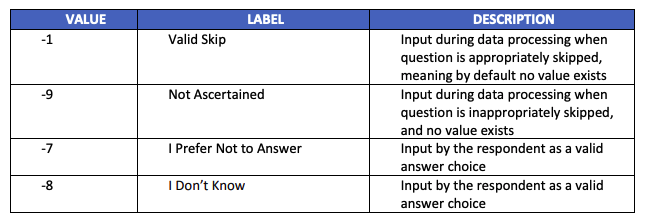

In [17]:
# Define the nonresponse codes
nonresponse_codes = [-1, -7, -8, -9]

# Initialize a dataframe to store counts
nonresponse_counts = pd.DataFrame(columns=['Column_Name', '-1', '-7', '-8', '-9'])

# Loop through each column and count nonresponse values
for col in student_trips_filtered.columns:
    counts = student_trips_filtered[col].isin(nonresponse_codes).groupby(student_trips_filtered[col]).sum()
    row = {
        'Column_Name': col,
        '-1': (student_trips_filtered[col] == -1).sum(),
        '-7': (student_trips_filtered[col] == -7).sum(),
        '-8': (student_trips_filtered[col] == -8).sum(),
        '-9': (student_trips_filtered[col] == -9).sum()
    }
    nonresponse_counts = pd.concat([nonresponse_counts, pd.DataFrame([row])], ignore_index=True)

# Show counts
nonresponse_counts

,Column_Name,-1,-7,-8,-9
0,HOUSEID,0,0,0,0
1,PERSONID,0,0,0,0
2,TRPMILES,0,0,0,89
3,SCHTRN1,0,19,4,7
4,WHYTO,0,26,4,1
5,DBHTNRNT,0,0,0,68
6,DBHUR,0,0,0,0
7,DBPPOPDN,0,0,0,68
8,DBRESDN,0,0,0,68
9,DTEEMPDN,0,0,0,67


Drop all rows with -7 to -9 in the SCHTRN1 column, since this will be our target variable column.

Drop all rows with -9 in the TRPMILES column.

Everything else is a valid skip.

In [18]:
# Drop rows where SCHTRN1 == -7 -> -9 (invalid target variable)
student_trips_filtered = student_trips_filtered[student_trips_filtered['SCHTRN1'] != -7]
student_trips_filtered = student_trips_filtered[student_trips_filtered['SCHTRN1'] != -8]
student_trips_filtered = student_trips_filtered[student_trips_filtered['SCHTRN1'] != -9]

# Drop rows where TRPMILES = -9 (invalid mileage data)
student_trips_filtered = student_trips_filtered[student_trips_filtered['TRPMILES'] != -9]

#Drop all -9 rows for remaining columns
# List of columns you want to check
variables = student_trips_filtered.columns

# Drop rows where ANY of those columns contains -9
student_trips_filtered_clean = student_trips_filtered[~student_trips_filtered[variables].eq(-9).any(axis=1)].copy()

# Optional: print how many rows were removed
removed = len(student_trips_filtered) - len(student_trips_filtered_clean)
print(f"Removed {removed} rows that contained -9 in any specified column.")

student_trips_filtered = student_trips_filtered_clean

# Reset index after dropping rows
student_trips_filtered = student_trips_filtered.reset_index(drop=True)

# Confirm changes
print(student_trips_filtered.shape)
student_trips_filtered['SCHTRN1'].value_counts()


Removed 108 rows that contained -9 in any specified column.
(89220, 27)


,count
SCHTRN1,
3,31291
10,25737
4,13650
1,6549
5,5382
6,3690
2,1484
11,577
97,275


Clean up repeats, since one student may have taken multiple trips (multiple rows), including trips that are unrelated to school.

First, group any "similar" rows (rows with the same HOUSEID **and** PERSONID).

Create a new column called 'SCHOOL_DISTANCE' with blank values.

Among each group of "similar" rows, find all rows where 'WHYTO' == 6 (indicates the trip was to go to school). Take the median value for 'TRPMILES' for all of these rows and fill that value in for the 'SCHOOL_DISTANCE' column for all these rows.

If there are no rows where 'WHYTO' == 6, do nothing.

Drop the 'WHYTO', 'HOUSEID', 'PERSONID' columns.

Drop all repeat occurences of rows with the same HOUSEID and PERSONID.

For all rows with a 0 in the 'SCHOOL_DISTANCE' column, fill in with the median value of the column.

*changed WHYTO filter to 8 to match codebook

In [19]:
import numpy as np

# Make a copy to be safe
student_trips_filtered = student_trips_filtered.copy()

# Step 1: Create a blank SCHOOL_DISTANCE and SCHOOL_TIME column
student_trips_filtered['SCHOOL_DISTANCE'] = np.nan


# Step 2: For each (HOUSEID, PERSONID) group, fill SCHOOL_DISTANCE and SCHOOL_TIME ith the median TRPMILES and TRVLCMIN where WHYTO == 6
def assign_school_time_distance(group):

    school_trips = group[group['WHYTO'] == 8]['TRPMILES']
    if not school_trips.empty:
        median_distance = school_trips.median()
        group['SCHOOL_DISTANCE'] = median_distance



    return group


student_trips_filtered = student_trips_filtered.groupby(['HOUSEID', 'PERSONID'], group_keys=False).apply(assign_school_time_distance)

# Step 3: Drop the WHYTO column
student_trips_filtered = student_trips_filtered.drop(columns=['WHYTO'])

# Step 4: Drop duplicate rows with same HOUSEID and PERSONID (keep the first)
student_trips_filtered = student_trips_filtered.drop_duplicates(subset=['HOUSEID', 'PERSONID'])

# Step 5: Fill SCHOOL_DISTANCE = 0 and SCHOOL_TIME = 0 with the column median
median_distance = student_trips_filtered.loc[student_trips_filtered['SCHOOL_DISTANCE'] > 0, 'SCHOOL_DISTANCE'].median()
student_trips_filtered['SCHOOL_DISTANCE'] = student_trips_filtered['SCHOOL_DISTANCE'].replace(0, np.nan)
student_trips_filtered['SCHOOL_DISTANCE'] = student_trips_filtered['SCHOOL_DISTANCE'].fillna(median_distance)


#drop HOUSEID and PERSONID columns
student_trips_filtered = student_trips_filtered.drop(columns=['HOUSEID'])
student_trips_filtered = student_trips_filtered.drop(columns=['PERSONID'])

# Step 6: Reset index
student_trips_filtered = student_trips_filtered.reset_index(drop=True)

# Confirm result
print(student_trips_filtered.shape)
student_trips_filtered.head()


(26181, 25)


/tmp/ipython-input-3407266805.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  student_trips_filtered = student_trips_filtered.groupby(['HOUSEID', 'PERSONID'], group_keys=False).apply(assign_school_time_distance)


,TRPMILES,SCHTRN1,DBHTNRNT,DBHUR,DBPPOPDN,DBRESDN,DTEEMPDN,DTHTNRNT,DTPPOPDN,DTRESDN,...,OTHTNRNT,OTPPOPDN,OTRESDN,CENSUS_D,HHFAMINC,HH_RACE,HH_HISP,MSASIZE,URBRUR,SCHOOL_DISTANCE
0,2.140,11,30,U,7000,3000,3000,30,7000,3000,...,30,3000,750,7,5,2,2,5,1,2.426
1,2.140,11,30,U,7000,3000,3000,30,7000,3000,...,30,3000,750,7,5,2,2,5,1,2.426
2,7.738,3,5,S,750,300,350,5,750,300,...,5,1500,750,7,11,1,2,5,1,7.738
3,0.702,10,20,S,7000,1500,1500,5,3000,1500,...,5,3000,1500,6,8,1,2,4,1,15.403
4,2.767,10,80,S,3000,750,1500,50,3000,1500,...,50,3000,1500,2,3,1,2,1,1,2.624


Drop the TRPMILES column.

In [20]:
student_trips_filtered = student_trips_filtered.drop(columns=['TRPMILES'])


Quick check: how many unique students in our dataset usually use a school bus?

In [21]:
# Count how many students have SCHTRN1 == 10
mode_9_count = student_trips_filtered[student_trips_filtered['SCHTRN1'] == 10].shape[0]
total_students = student_trips_filtered.shape[0]

print(f"School trips with SCHTRN 9: {mode_9_count}")
print(f"Total students: {total_students}")
print(f"Percentage: {mode_9_count / total_students * 100:.2f}%")


School trips with SCHTRN 9: 7935
Total students: 26181
Percentage: 30.31%


Re encode the SCHTRN1 column to a binary NEEDS_SCHOOL_BUS column. Code 10 (formerly 9) indicates the student usually takes a bus to school, and all other codes indicate other means of transport.

**Limitation Note: This process assumes that every student who uses a school bus needs a school bus, and that if a student doesn't usually use a bus they do not need a bus. This is not always correct in practice, since many students might not use a bus because of bad bus service, even if they actually need it. Future changes to address this limitation might be to more carefully analyze what other modes of transport students use and for how many miles to help determine which students NEED a bus vs actually USE a bus.**

In [22]:
# Re-encode the SCHTRN1 column to indicate "needs school bus"
# Original column: SCHTRN1
# Rule: 10 → 1 (needs school bus), everything else → 0

student_trips_filtered['NEEDS_SCHOOL_BUS'] = student_trips_filtered['SCHTRN1'].apply(lambda x: 1 if x == 10 else 0)

# Optional: drop the original TRPTRANS column if no longer needed
student_trips_filtered = student_trips_filtered.drop(columns=['SCHTRN1'])

# Verify changes
student_trips_filtered[['NEEDS_SCHOOL_BUS']].head(30)

,NEEDS_SCHOOL_BUS
0,0
1,0
2,0
3,1
4,1
5,0
6,0
7,0
8,0
9,0


**One Hot Encoding**

First, download the codebook file and load it in. This codebook contains mappings for every code used for all categorical variables, as well as for some numerical variables.

In [23]:

# Load all sheets at once as a dictionary of DataFrames
all_sheets = pd.read_excel('codebook_v1.2.xlsx', sheet_name=None)

# Combine all sheets into one DataFrame
codebook_df = pd.concat(all_sheets.values(), ignore_index=True)



Forward fill the variable names so that each code is associated with a column variable name.

In [24]:
# Forward fill the 'Name' column so each code row knows its variable
codebook_df['Name'] = codebook_df['Name'].ffill()
codebook_df.head()

,Name,Label,Type,Length,Code / Range,Frequency,Weighted
0,BIKE,Frequency of Bicycle Use for Travel,C,2.0,-9=Not ascertained,14661,1.378796e+07
1,BIKE,NaN,NaN,NaN,-8=I don't know,10,1.090766e+04
2,BIKE,NaN,NaN,NaN,-7=I prefer not to answer,5,3.267190e+04
3,BIKE,NaN,NaN,NaN,01=Daily,1870,1.979683e+06
4,BIKE,NaN,NaN,NaN,02=A few times a week,5363,4.961863e+06


Keep only the Name and Code / Range columns.

Our student_trips_filtered dataframe has column names based on the TRIPS file, which has _TRIPS appended to most of the column names. Clean up the column names in student_trips_filtered so they match the names in the codebook.

Filter the codebook so that only codes for variables actually present in our dataframe are preserved.

In [25]:
# Step 2: Keep only the relevant columns
codebook_df = codebook_df[['Name', 'Code / Range']]

# Step 3: Get only categorical columns
school_trip_cols = [
    "DBHTNRNT",
    "DBHUR",
    "DBPPOPDN",
    "DBRESDN",
    "DTEEMPDN",
    "DTHTNRNT",
    "DTPPOPDN",
    "DTRESDN",

    "OBHTNRNT",
    "OBHUR",
    "OBPPOPDN",
    "OBRESDN",
    "OTEEMPDN",
    "OTHTNRNT",
    "OTPPOPDN",
    "OTRESDN",

    "CENSUS_D",
    "HHFAMINC",
    "HH_RACE",
    "HH_HISP",
    "MSASIZE",
    "URBRUR",
]

# Step 4: Clean up names to match between codebook and your df
# The codebook may use names like 'HHFAMINC' while your df uses 'HHFAMINC_TRIP'
# So we match ignoring trailing suffixes like '_TRIP'
base_names = [c.replace('_TRIP', '') for c in school_trip_cols]

# Step 5: Filter the codebook so we only keep rows whose Name matches one of these
filtered_codebook = codebook_df[codebook_df['Name'].isin(base_names)].copy()

# Step 6: Display the first few rows to confirm
filtered_codebook.head(20)

,Name,Code / Range
67,CENSUS_D,01=New England
68,CENSUS_D,02=Middle Atlantic
69,CENSUS_D,03=East North Central
70,CENSUS_D,04=West North Central
71,CENSUS_D,05=South Atlantic
72,CENSUS_D,06=East South Central
73,CENSUS_D,07=West South Central
74,CENSUS_D,08=Mountain
75,CENSUS_D,09=Pacific
126,HHFAMINC,-9=Not ascertained


Remove the _TRIP suffix from all columns in student_trips_filtered that have the suffix.

In [26]:
# Remove '_TRIP' suffix from all column names
student_trips_filtered.columns = [col.replace('_TRIP', '') for col in student_trips_filtered.columns]
student_trips_filtered.head()

,DBHTNRNT,DBHUR,DBPPOPDN,DBRESDN,DTEEMPDN,DTHTNRNT,DTPPOPDN,DTRESDN,OBHTNRNT,OBHUR,...,OTPPOPDN,OTRESDN,CENSUS_D,HHFAMINC,HH_RACE,HH_HISP,MSASIZE,URBRUR,SCHOOL_DISTANCE,NEEDS_SCHOOL_BUS
0,30,U,7000,3000,3000,30,7000,3000,70,U,...,3000,750,7,5,2,2,5,1,2.426,0
1,30,U,7000,3000,3000,30,7000,3000,70,U,...,3000,750,7,5,2,2,5,1,2.426,0
2,5,S,750,300,350,5,750,300,0,S,...,1500,750,7,11,1,2,5,1,7.738,0
3,20,S,7000,1500,1500,5,3000,1500,20,S,...,3000,1500,6,8,1,2,4,1,15.403,1
4,80,S,3000,750,1500,50,3000,1500,50,S,...,3000,1500,2,3,1,2,1,1,2.624,1


To one hot encode, we can create a mapping dictionary that maps integer codes present in each column of student_trips_filtered to their corresponding "human readable column names" in the codebook dataframe.

Keep in mind that the numerical codes in the codebook dataframe appear as strings, but are integer entries in  student_trips_filtered, so str->int conversion is needed to match them.

Finally, we can use pd.get_dummies to one hot encode all the categorical columns, rewriting the auto-generated column names to the human readable versions using the mapping dictionary.

In [27]:
# Step 1: Build mapping dictionary
mapping_dict = {}
for var in codebook_df['Name'].unique():
    subset = codebook_df[codebook_df['Name'] == var]['Code / Range'].dropna()
    var_map = {}
    for entry in subset:
        if '=' in entry:
            code, label = entry.split('=', 1)
            try:
                var_map[int(code.strip())] = label.strip()
            except ValueError:
                var_map[code.strip()] = label.strip()
    mapping_dict[var] = var_map

# Step 2: Convert categorical columns to int where possible
for col in mapping_dict.keys():
    if col in student_trips_filtered.columns:
        try:
            student_trips_filtered[col] = student_trips_filtered[col].astype(int)
        except ValueError:
            pass

# Step 3: Identify categorical vars (binary or not)
categorical_vars = [col for col in mapping_dict.keys() if col in student_trips_filtered.columns]

# Step 4: One-hot encode WITHOUT dropping dummies (Random Forest does not require drop_first)
onehot_df = pd.get_dummies(
    student_trips_filtered,
    columns=categorical_vars,
    prefix=categorical_vars,
    dtype=int,
    drop_first=False   # <--- changed here
)

# Step 5: Rename one-hot columns to human-readable labels
new_columns = []
for col in onehot_df.columns:
    matched = False
    for var, code_map in mapping_dict.items():
        for code, label in code_map.items():
            if col == f"{var}_{code}":
                new_columns.append(f"{var}_{label}")
                matched = True
                break
        if matched:
            break
    if not matched:
        new_columns.append(col)

onehot_df.columns = new_columns

onehot_df.head()


,SCHOOL_DISTANCE,NEEDS_SCHOOL_BUS,CENSUS_D_New England,CENSUS_D_Middle Atlantic,CENSUS_D_East North Central,CENSUS_D_West North Central,CENSUS_D_South Atlantic,CENSUS_D_East South Central,CENSUS_D_West South Central,CENSUS_D_Mountain,...,"OTPPOPDN_10,000-24,999","OTPPOPDN_25,000-999,999",OTRESDN_0-99,OTRESDN_100-499,OTRESDN_500-999,"OTRESDN_1,000-1,999","OTRESDN_2,000-3,999","OTRESDN_4,000-9,999","OTRESDN_10,000-24,999","OTRESDN_25,000-999,999"
0,2.426,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,2.426,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,7.738,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,15.403,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2.624,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Verify the one hot encoding and renaming.

In [28]:
# Get the dimensions
print("Shape of the one-hot encoded dataframe:", onehot_df.shape)

# Print all column names neatly
print("Columns:")
for col in onehot_df.columns:
    print(col)


Shape of the one-hot encoded dataframe: (26181, 178)
Columns:
SCHOOL_DISTANCE
NEEDS_SCHOOL_BUS
CENSUS_D_New England
CENSUS_D_Middle Atlantic
CENSUS_D_East North Central
CENSUS_D_West North Central
CENSUS_D_South Atlantic
CENSUS_D_East South Central
CENSUS_D_West South Central
CENSUS_D_Mountain
CENSUS_D_Pacific
HHFAMINC_I don't know
HHFAMINC_I prefer not to answer
HHFAMINC_Less than $10,000
HHFAMINC_$10,000 to $14,999
HHFAMINC_$15,000 to $24,999
HHFAMINC_$25,000 to $34,999
HHFAMINC_$35,000 to $49,999
HHFAMINC_$50,000 to $74,999
HHFAMINC_$75,000 to $99,999
HHFAMINC_$100,000 to $124,999
HHFAMINC_$125,000 to $149,999
HHFAMINC_$150,000 to $199,999
HHFAMINC_$200,000 or more
HH_HISP_Refused
HH_HISP_Yes
HH_HISP_No
HH_RACE_Don't know
HH_RACE_Refused
HH_RACE_White
HH_RACE_Black or African American
HH_RACE_Asian
HH_RACE_American Indian or Alaska Native
HH_RACE_Native Hawaiian or other Pacific Islander
HH_RACE_Multiple responses selected
HH_RACE_Some other race
MSASIZE_In an MSA of Less than 250,0

Make a correlation matrix.

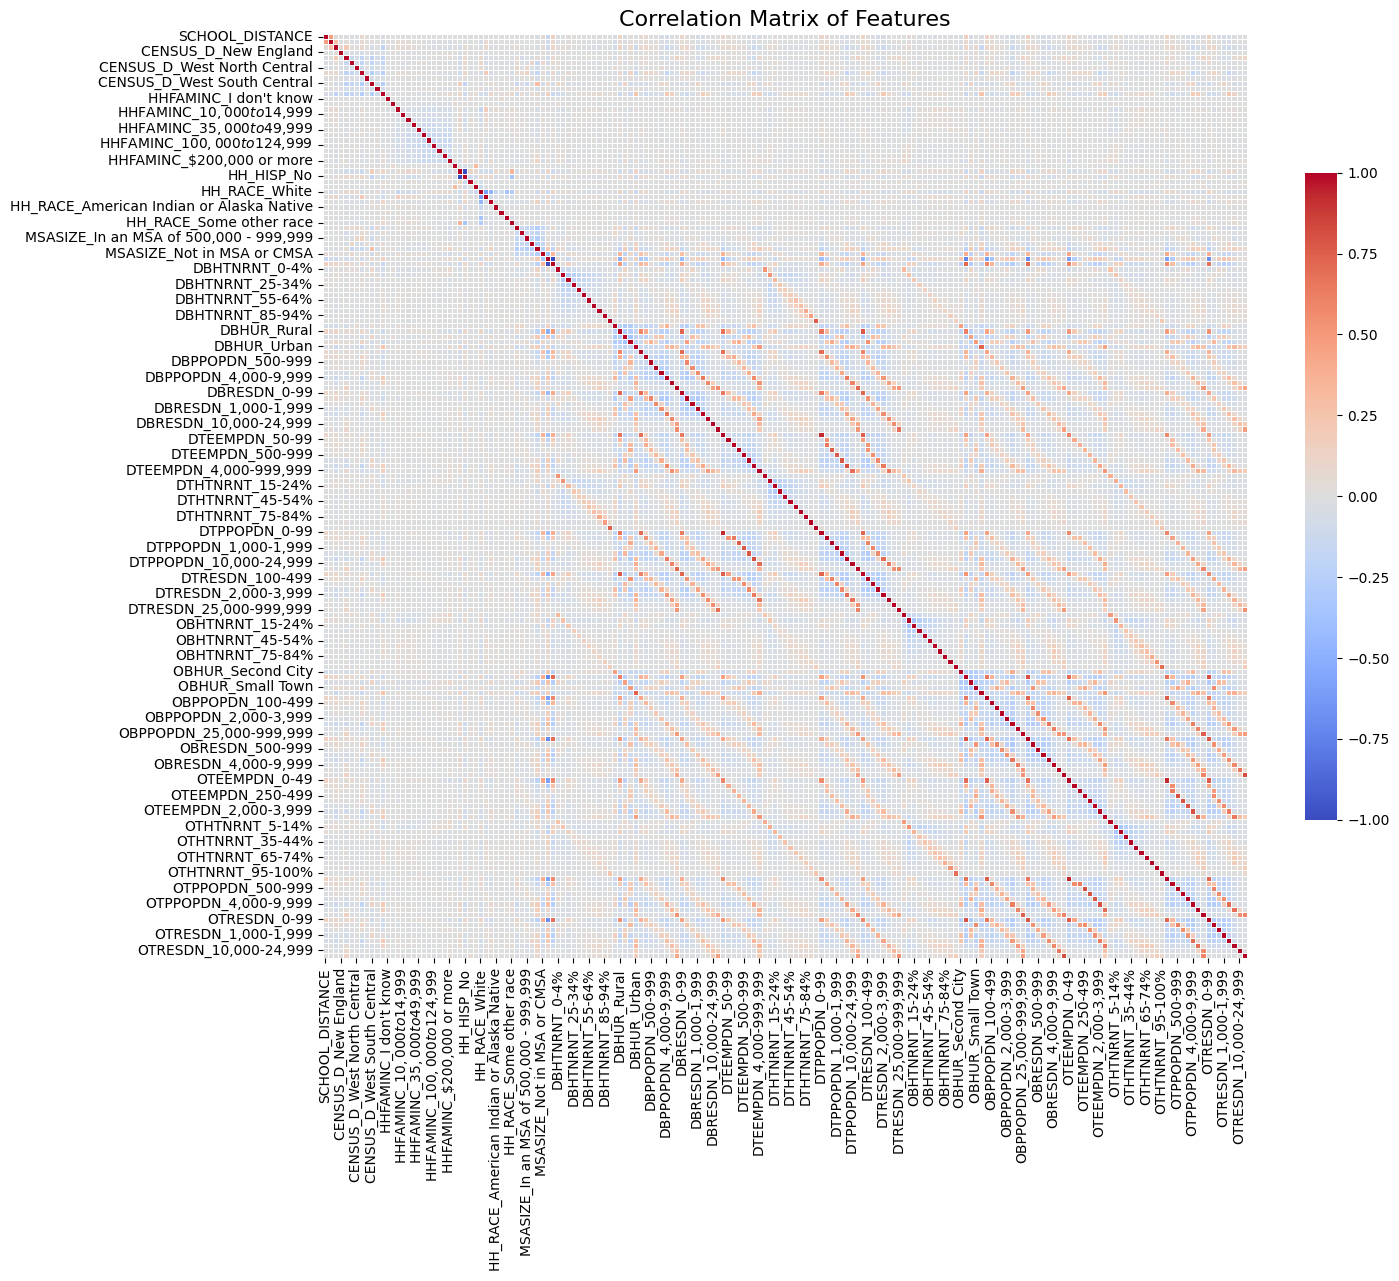

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_matrix = onehot_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Draw the heatmap
sns.heatmap(corr_matrix,
            cmap='coolwarm',
            center=0,
            annot=False,  # True if you want the numbers on the heatmap
            fmt=".2f",
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.7})

plt.title("Correlation Matrix of Features", fontsize=16)
plt.show()


**Further Cleanup of Features**

Make boxplots of numerical values to catch outliers.

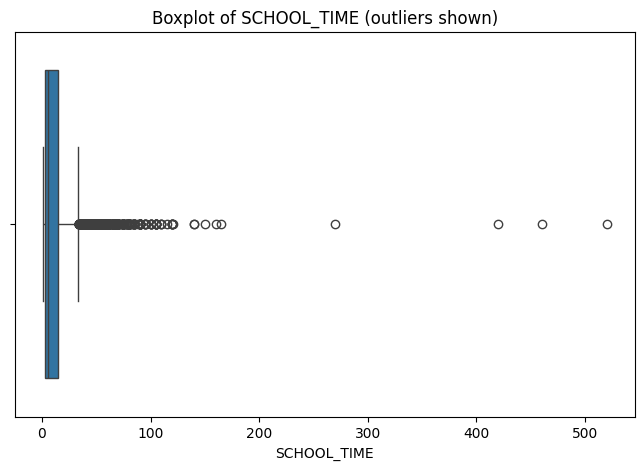

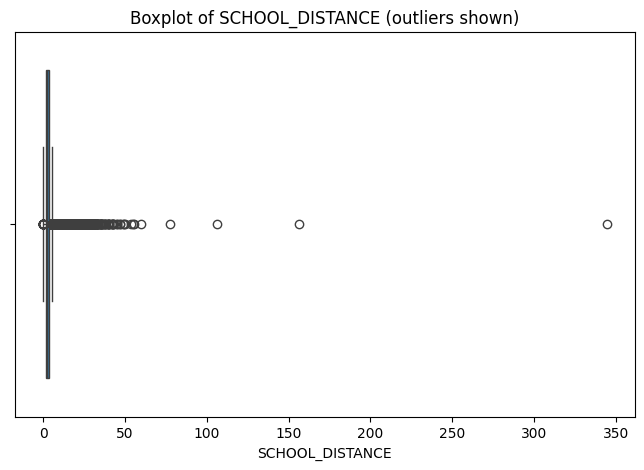

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical variables
numerical_vars = [
    'SCHOOL_TIME', 'SCHOOL_DISTANCE'
]

# Loop through each variable and create a boxplot
for var in numerical_vars:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=onehot_df[var])
    plt.title(f'Boxplot of {var} (outliers shown)')
    plt.xlabel(var)
    plt.show()


Let's figure out how many outliers we need to get rid of.

In [ ]:
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = series[(series < lower) | (series > upper)]
    return len(outliers), len(outliers) / len(series) * 100

for var in ['SCHOOL_DISTANCE']:
    count, percent = count_outliers(onehot_df[var])
    print(f"{var}: {count} outliers ({percent:.2f}% of total entries)")


SCHOOL_TIME: 1806 outliers (6.90% of total entries)
SCHOOL_DISTANCE: 3942 outliers (15.06% of total entries)


We can leave the outliers for school time as is, but we need to take care of the outliers for school distance. Let's visualize the breakdown of school bus users.

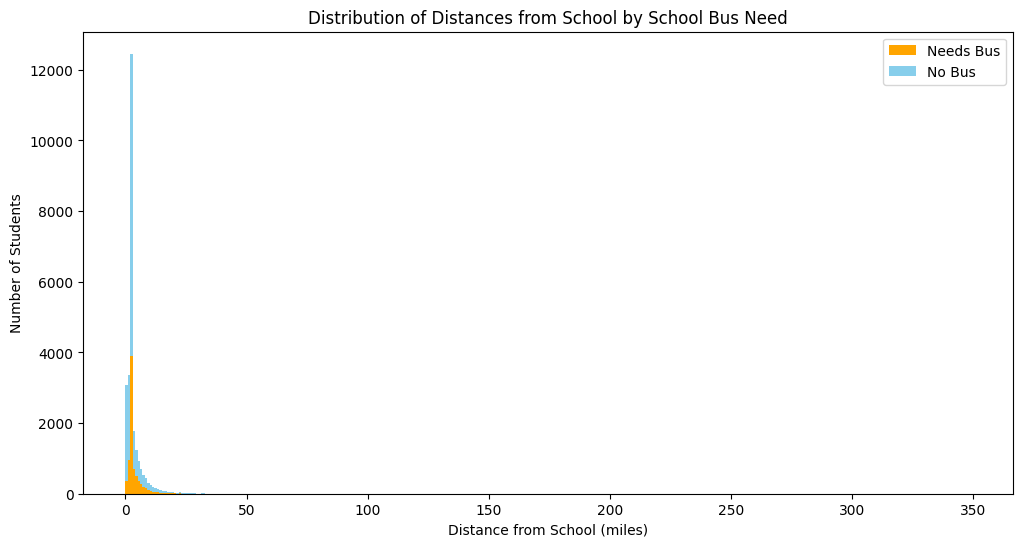

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define bins every 5 miles
max_distance = student_trips_filtered['SCHOOL_DISTANCE'].max()
bins = np.arange(0, max_distance + 5, 1)

# Split distances by NEED_SCHOOL_BUS
distance_bus = student_trips_filtered[student_trips_filtered['NEEDS_SCHOOL_BUS'] == 1]['SCHOOL_DISTANCE']
distance_no_bus = student_trips_filtered[student_trips_filtered['NEEDS_SCHOOL_BUS'] == 0]['SCHOOL_DISTANCE']

# Plot stacked histogram
plt.figure(figsize=(12,6))
plt.hist([distance_bus, distance_no_bus], bins=bins, stacked=True, color=['orange', 'skyblue'], label=['Needs Bus', 'No Bus'])
plt.xlabel('Distance from School (miles)')
plt.ylabel('Number of Students')
plt.title('Distribution of Distances from School by School Bus Need')
plt.legend()
plt.show()


Let's analyze just the outliers.

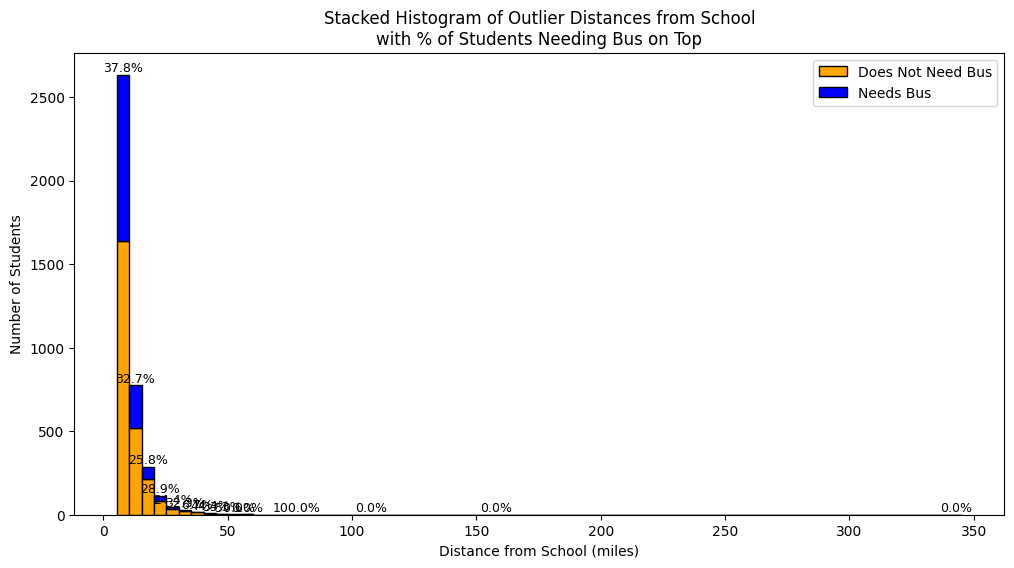

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Identify outliers using 1.5*IQR
Q1 = student_trips_filtered['SCHOOL_DISTANCE'].quantile(0.25)
Q3 = student_trips_filtered['SCHOOL_DISTANCE'].quantile(0.75)
IQR = Q3 - Q1
outliers = student_trips_filtered[student_trips_filtered['SCHOOL_DISTANCE'] > Q3 + 1.5*IQR]

# Define bins
bins = np.arange(outliers['SCHOOL_DISTANCE'].min(), outliers['SCHOOL_DISTANCE'].max() + 5, 5)

# Compute counts per bin
counts_bus1, _ = np.histogram(outliers[outliers['NEEDS_SCHOOL_BUS']==1]['SCHOOL_DISTANCE'], bins=bins)
counts_bus0, _ = np.histogram(outliers[outliers['NEEDS_SCHOOL_BUS']==0]['SCHOOL_DISTANCE'], bins=bins)
counts_total = counts_bus1 + counts_bus0

# Plot stacked histogram
plt.figure(figsize=(12,6))
plt.bar(bins[:-1], counts_bus0, width=5, color='orange', label='Does Not Need Bus', align='edge', edgecolor='black')
plt.bar(bins[:-1], counts_bus1, width=5, bottom=counts_bus0, color='blue', label='Needs Bus', align='edge', edgecolor='black')

# Add percent labels
for i in range(len(bins)-1):
    if counts_total[i] > 0:
        pct = counts_bus1[i] / counts_total[i] * 100
        plt.text(bins[i] + 2.5, counts_total[i] + 1, f'{pct:.1f}%', ha='center', va='bottom', fontsize=9)

plt.xlabel('Distance from School (miles)')
plt.ylabel('Number of Students')
plt.title('Stacked Histogram of Outlier Distances from School\nwith % of Students Needing Bus on Top')
plt.legend()
plt.show()


Filter out all outliers above 30 miles of distance from school since 0% of these students used a bus (likely edge cases and unrepresentative trips).

In [29]:
# Remove rows where SCHOOL_DISTANCE > 30 miles
student_trips_filtered = student_trips_filtered[student_trips_filtered['SCHOOL_DISTANCE'] <= 30].reset_index(drop=True)


Many schools have a "minimum distance" policy for school bus users.

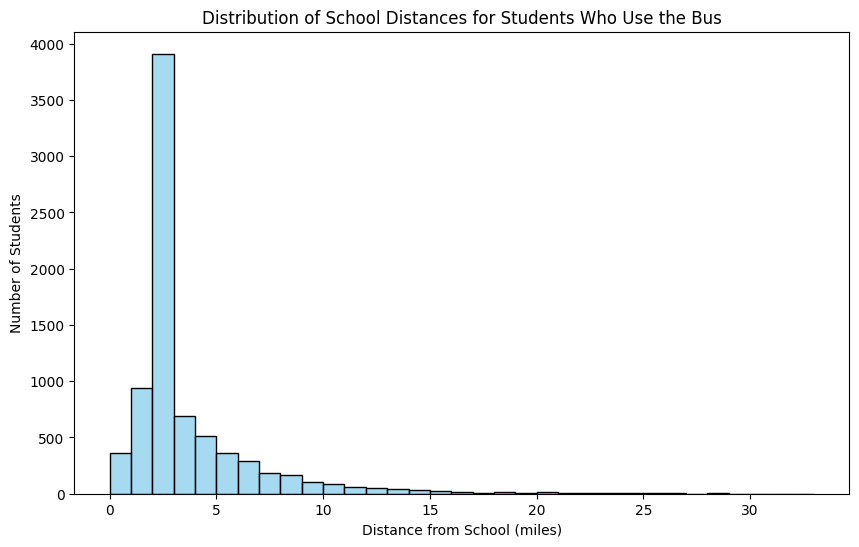

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter to students who need a bus
bus_students = student_trips_filtered[student_trips_filtered['NEEDS_SCHOOL_BUS'] == 1]

# Plot histogram
plt.figure(figsize=(10,6))
sns.histplot(bus_students['SCHOOL_DISTANCE'], bins=range(0, int(bus_students['SCHOOL_DISTANCE'].max()) + 5, 1),
             kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of School Distances for Students Who Use the Bus')
plt.xlabel('Distance from School (miles)')
plt.ylabel('Number of Students')
plt.xticks(range(0, int(bus_students['SCHOOL_DISTANCE'].max()) + 5, 5))
plt.show()


Since there is no known standard minimum distance that we can filter by, it is best to keep all the entries of students. The model will learn that students closer to school do not need a bus (usually because policy dictates that they don't).

Remove highly correlated columns (deactivated for now)

In [ ]:
"""
# Step 1: Compute correlation matrix for all numeric columns
corr_matrix = onehot_df.corr().abs()  # absolute correlation

# Step 2: Create an upper triangle mask so we don't consider duplicate pairs
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Step 3: Find columns with correlation greater than threshold
threshold = 0.9
to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > threshold)]

print(f"Columns to drop due to high correlation (> {threshold}):")
print(to_drop)

# Step 4: Drop these columns
onehot_df_reduced = onehot_df.drop(columns=to_drop)

print(f"Shape before dropping: {onehot_df.shape}")
print(f"Shape after dropping: {onehot_df_reduced.shape}")
"""


'\n# Step 1: Compute correlation matrix for all numeric columns\ncorr_matrix = onehot_df.corr().abs()  # absolute correlation\n\n# Step 2: Create an upper triangle mask so we don\'t consider duplicate pairs\nupper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))\n\n# Step 3: Find columns with correlation greater than threshold\nthreshold = 0.9\nto_drop = [col for col in upper_tri.columns if any(upper_tri[col] > threshold)]\n\nprint(f"Columns to drop due to high correlation (> {threshold}):")\nprint(to_drop)\n\n# Step 4: Drop these columns\nonehot_df_reduced = onehot_df.drop(columns=to_drop)\n\nprint(f"Shape before dropping: {onehot_df.shape}")\nprint(f"Shape after dropping: {onehot_df_reduced.shape}")\n'

In [30]:
# Get the dimensions
print("Shape of the one-hot encoded dataframe:", onehot_df.shape)

# Print all column names neatly
print("Columns:")
for col in onehot_df.columns:
    print(col)

Shape of the one-hot encoded dataframe: (26181, 178)
Columns:
SCHOOL_DISTANCE
NEEDS_SCHOOL_BUS
CENSUS_D_New England
CENSUS_D_Middle Atlantic
CENSUS_D_East North Central
CENSUS_D_West North Central
CENSUS_D_South Atlantic
CENSUS_D_East South Central
CENSUS_D_West South Central
CENSUS_D_Mountain
CENSUS_D_Pacific
HHFAMINC_I don't know
HHFAMINC_I prefer not to answer
HHFAMINC_Less than $10,000
HHFAMINC_$10,000 to $14,999
HHFAMINC_$15,000 to $24,999
HHFAMINC_$25,000 to $34,999
HHFAMINC_$35,000 to $49,999
HHFAMINC_$50,000 to $74,999
HHFAMINC_$75,000 to $99,999
HHFAMINC_$100,000 to $124,999
HHFAMINC_$125,000 to $149,999
HHFAMINC_$150,000 to $199,999
HHFAMINC_$200,000 or more
HH_HISP_Refused
HH_HISP_Yes
HH_HISP_No
HH_RACE_Don't know
HH_RACE_Refused
HH_RACE_White
HH_RACE_Black or African American
HH_RACE_Asian
HH_RACE_American Indian or Alaska Native
HH_RACE_Native Hawaiian or other Pacific Islander
HH_RACE_Multiple responses selected
HH_RACE_Some other race
MSASIZE_In an MSA of Less than 250,0

Let's seperate this data into smaller datasets, differentiated by region (Census Division). We will train a seperate RF on each sub-dataset. Our pipeline for classification will be to identify which region a row belongs to and run the appropriate RF on it (To be created later).

In [31]:
# List of CENSUS_D columns
census_d_cols = [
    'CENSUS_D_New England',
    'CENSUS_D_Middle Atlantic',
    'CENSUS_D_East North Central',
    'CENSUS_D_West North Central',
    'CENSUS_D_South Atlantic',
    'CENSUS_D_East South Central',
    'CENSUS_D_West South Central',
    'CENSUS_D_Mountain',
    'CENSUS_D_Pacific'
]

# Dictionary to store mini dataframes
mini_dfs = {}

# Iterate over each Census D column
for col in census_d_cols:
    # Select only rows where this category is 1
    subset = onehot_df[onehot_df[col] == 1].copy()

    # Drop all Census D columns
    subset = subset.drop(columns=census_d_cols)

    # Store in dictionary
    mini_dfs[col] = subset

# Now mini_dfs contains a separate DataFrame for each Census D category
# Example access:
print("Number of rows in New England mini-df:", len(mini_dfs['CENSUS_D_New England']))


Number of rows in New England mini-df: 362


Now, let's train a random forest on each of these mini datasets with an 80-20 train-test split, and store the forests in another dictionary. Let's also gather the precision, accuracy, f1, recall, and roc-auc for each RF and display them all for both values of the target (0 and 1 NEEDS_SCHOOL_BUS), along with confusion matrices.

In [33]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score,
    roc_auc_score, confusion_matrix, classification_report
)

# Assume mini_dfs is the dictionary from your previous step
target_col = 'NEEDS_SCHOOL_BUS'

# Dictionary to store trained Random Forests
rf_models = {}

# Dictionary to store metrics
rf_metrics = {}

for census_cat, df in mini_dfs.items():
    print(f"\n=== Processing {census_cat} ===")

    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Train-test split 80-20
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Train RF
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)

    # Store model
    rf_models[census_cat] = rf

    # Predictions
    y_pred = rf.predict(X_test)
    y_prob = rf.predict_proba(X_test)[:, 1]  # for ROC-AUC

    # Metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision_0': precision_score(y_test, y_pred, pos_label=0, zero_division=0),
        'precision_1': precision_score(y_test, y_pred, pos_label=1, zero_division=0),
        'recall_0': recall_score(y_test, y_pred, pos_label=0, zero_division=0),
        'recall_1': recall_score(y_test, y_pred, pos_label=1, zero_division=0),
        'f1_0': f1_score(y_test, y_pred, pos_label=0, zero_division=0),
        'f1_1': f1_score(y_test, y_pred, pos_label=1, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        "y_pred_array": y_pred,
        "y_test_array": y_test.values,
        "y_prob_array": y_prob
    }

    rf_metrics[census_cat] = metrics

    # Display metrics
    print(f"Accuracy: {metrics['accuracy']:.3f}")
    print(f"ROC-AUC: {metrics['roc_auc']:.3f}")
    print(f"Precision: 0={metrics['precision_0']:.3f}, 1={metrics['precision_1']:.3f}")
    print(f"Recall: 0={metrics['recall_0']:.3f}, 1={metrics['recall_1']:.3f}")
    print(f"F1-score: 0={metrics['f1_0']:.3f}, 1={metrics['f1_1']:.3f}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])



=== Processing CENSUS_D_New England ===
Accuracy: 0.753
ROC-AUC: 0.716
Precision: 0=0.745, 1=0.769
Recall: 0=0.854, 1=0.625
F1-score: 0=0.795, 1=0.690
Confusion Matrix:
[[35  6]
 [12 20]]

=== Processing CENSUS_D_Middle Atlantic ===
Accuracy: 0.729
ROC-AUC: 0.805
Precision: 0=0.728, 1=0.731
Recall: 0=0.637, 1=0.805
F1-score: 0=0.679, 1=0.766
Confusion Matrix:
[[195 111]
 [ 73 301]]

=== Processing CENSUS_D_East North Central ===
Accuracy: 0.794
ROC-AUC: 0.850
Precision: 0=0.797, 1=0.784
Recall: 0=0.916, 1=0.566
F1-score: 0=0.852, 1=0.658
Confusion Matrix:
[[361  33]
 [ 92 120]]

=== Processing CENSUS_D_West North Central ===
Accuracy: 0.786
ROC-AUC: 0.790
Precision: 0=0.800, 1=0.739
Recall: 0=0.914, 1=0.515
F1-score: 0=0.853, 1=0.607
Confusion Matrix:
[[128  12]
 [ 32  34]]

=== Processing CENSUS_D_South Atlantic ===
Accuracy: 0.750
ROC-AUC: 0.809
Precision: 0=0.757, 1=0.730
Recall: 0=0.889, 1=0.512
F1-score: 0=0.818, 1=0.602
Confusion Matrix:
[[627  78]
 [201 211]]

=== Processing CE

Let's figure out the overall metrics.

In [34]:
def show_stats(rf_metrics):

  # Initialize accumulators
  total_samples = 0
  weighted_acc = 0
  weighted_precision_0 = 0
  weighted_precision_1 = 0
  weighted_recall_0 = 0
  weighted_recall_1 = 0
  weighted_f1_0 = 0
  weighted_f1_1 = 0
  total_conf_matrix = np.zeros((2,2), dtype=int)

  all_y_test = []
  all_y_prob = []

  for cat, metrics in rf_metrics.items():
      n = metrics['confusion_matrix'].sum()  # total samples in this mini-test
      total_samples += n

      # Accuracy weighted
      weighted_acc += metrics['accuracy'] * n

      # Precision/recall/f1 weighted by number of class instances
      cm = metrics['confusion_matrix']
      n0 = cm[0,0] + cm[0,1]  # true class 0
      n1 = cm[1,0] + cm[1,1]  # true class 1

      weighted_precision_0 += metrics['precision_0'] * n0
      weighted_precision_1 += metrics['precision_1'] * n1
      weighted_recall_0 += metrics['recall_0'] * n0
      weighted_recall_1 += metrics['recall_1'] * n1
      weighted_f1_0 += metrics['f1_0'] * n0
      weighted_f1_1 += metrics['f1_1'] * n1

      # Confusion matrix sum
      total_conf_matrix += cm

      # Collect probs for ROC-AUC
      all_y_test.append(metrics.get('y_test_array'))
      all_y_prob.append(metrics.get('y_prob_array'))

  # Collect total class counts
  total_n0 = 0
  total_n1 = 0
  for m in rf_metrics.values():
      cm = m['confusion_matrix']
      total_n0 += cm[0,0]+cm[0,1]
      total_n1 += cm[1,0]+cm[1,1]

  overall_metrics = {
      'accuracy': weighted_acc / total_samples,
      'precision_0': weighted_precision_0 / total_n0,
      'precision_1': weighted_precision_1 / total_n1,
      'recall_0': weighted_recall_0 / total_n0,
      'recall_1': weighted_recall_1 / total_n1,
      'f1_0': weighted_f1_0 / total_n0,
      'f1_1': weighted_f1_1 / total_n1,
      'roc_auc': roc_auc_score(np.concatenate(all_y_test), np.concatenate(all_y_prob)),
      'confusion_matrix': total_conf_matrix
  }

  for i in overall_metrics:
    print(i, ":", overall_metrics[i])


In [35]:
show_stats(rf_metrics)

accuracy : 0.8079786218744035
precision_0 : 0.8248728104416079
precision_1 : 0.7550799886243347
recall_0 : 0.92
recall_1 : 0.5506607929515418
f1_0 : 0.8685990783378001
f1_1 : 0.622309891451214
roc_auc : 0.8457041130374062
confusion_matrix : [[3358  292]
 [ 714  875]]


Let's try and make this better by using SMOTE.

In [36]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score,
    roc_auc_score, confusion_matrix, classification_report
)
from imblearn.over_sampling import SMOTE

# Assume mini_dfs is the dictionary from your previous step
target_col = 'NEEDS_SCHOOL_BUS'

# Dictionary to store trained Random Forests
smote_rf_models = {}

# Dictionary to store metrics
smote_rf_metrics = {}

for census_cat, df in mini_dfs.items():
    print(f"\n=== Processing {census_cat} ===")

    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Train-test split 80-20
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # --- APPLY SMOTE ON TRAINING DATA ONLY ---
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

    # Train RF on the resampled data
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train_res, y_train_res)

    # Store model
    smote_rf_models[census_cat] = rf

    # Predictions
    y_pred = rf.predict(X_test)
    y_prob = rf.predict_proba(X_test)[:, 1]  # for ROC-AUC

    # Metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision_0': precision_score(y_test, y_pred, pos_label=0, zero_division=0),
        'precision_1': precision_score(y_test, y_pred, pos_label=1, zero_division=0),
        'recall_0': recall_score(y_test, y_pred, pos_label=0, zero_division=0),
        'recall_1': recall_score(y_test, y_pred, pos_label=1, zero_division=0),
        'f1_0': f1_score(y_test, y_pred, pos_label=0, zero_division=0),
        'f1_1': f1_score(y_test, y_pred, pos_label=1, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        "y_pred_array": y_pred,
        "y_test_array": y_test.values,
        "y_prob_array": y_prob
    }

    smote_rf_metrics[census_cat] = metrics

    # Display metrics
    print(f"Accuracy: {metrics['accuracy']:.3f}")
    print(f"ROC-AUC: {metrics['roc_auc']:.3f}")
    print(f"Precision: 0={metrics['precision_0']:.3f}, 1={metrics['precision_1']:.3f}")
    print(f"Recall: 0={metrics['recall_0']:.3f}, 1={metrics['recall_1']:.3f}")
    print(f"F1-score: 0={metrics['f1_0']:.3f}, 1={metrics['f1_1']:.3f}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])



=== Processing CENSUS_D_New England ===
Accuracy: 0.726
ROC-AUC: 0.728
Precision: 0=0.744, 1=0.700
Recall: 0=0.780, 1=0.656
F1-score: 0=0.762, 1=0.677
Confusion Matrix:
[[32  9]
 [11 21]]

=== Processing CENSUS_D_Middle Atlantic ===
Accuracy: 0.729
ROC-AUC: 0.804
Precision: 0=0.710, 1=0.744
Recall: 0=0.673, 1=0.775
F1-score: 0=0.691, 1=0.759
Confusion Matrix:
[[206 100]
 [ 84 290]]

=== Processing CENSUS_D_East North Central ===
Accuracy: 0.790
ROC-AUC: 0.845
Precision: 0=0.823, 1=0.720
Recall: 0=0.863, 1=0.656
F1-score: 0=0.843, 1=0.686
Confusion Matrix:
[[340  54]
 [ 73 139]]

=== Processing CENSUS_D_West North Central ===
Accuracy: 0.772
ROC-AUC: 0.795
Precision: 0=0.804, 1=0.679
Recall: 0=0.879, 1=0.545
F1-score: 0=0.840, 1=0.605
Confusion Matrix:
[[123  17]
 [ 30  36]]

=== Processing CENSUS_D_South Atlantic ===
Accuracy: 0.747
ROC-AUC: 0.808
Precision: 0=0.776, 1=0.683
Recall: 0=0.841, 1=0.585
F1-score: 0=0.807, 1=0.630
Confusion Matrix:
[[593 112]
 [171 241]]

=== Processing CE

In [37]:
show_stats(smote_rf_metrics)
show_stats(rf_metrics)

accuracy : 0.8022523382324871
precision_0 : 0.8357511227327036
precision_1 : 0.6984009682017611
recall_0 : 0.8901369863013698
recall_1 : 0.6003775959723097
f1_0 : 0.8617692508804758
f1_1 : 0.640837661721743
roc_auc : 0.8426876557152339
confusion_matrix : [[3249  401]
 [ 635  954]]
accuracy : 0.8079786218744035
precision_0 : 0.8248728104416079
precision_1 : 0.7550799886243347
recall_0 : 0.92
recall_1 : 0.5506607929515418
f1_0 : 0.8685990783378001
f1_1 : 0.622309891451214
roc_auc : 0.8457041130374062
confusion_matrix : [[3358  292]
 [ 714  875]]


Looks like recall went up a little, which is a good sign. Let's lower the threshold to prioritize recall even more.

In [38]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score,
    roc_auc_score, confusion_matrix, classification_report
)
from imblearn.over_sampling import SMOTE

# Assume mini_dfs is the dictionary from your previous step
target_col = 'NEEDS_SCHOOL_BUS'

# Dictionary to store trained Random Forests
thresh_smote_rf_models = {}

# Dictionary to store metrics
thresh_smote_rf_metrics = {}

for census_cat, df in mini_dfs.items():
    print(f"\n=== Processing {census_cat} ===")

    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Train-test split 80-20
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # --- APPLY SMOTE ON TRAINING DATA ONLY ---
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

    # Train RF on the resampled data
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train_res, y_train_res)

    # Store model
    thresh_smote_rf_models[census_cat] = rf

    # Predictions
    y_prob = rf.predict_proba(X_test)[:, 1]  # probability for class 1
    y_pred = (y_prob >= 0.40).astype(int)   # apply threshold of 0.40


    # Metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision_0': precision_score(y_test, y_pred, pos_label=0, zero_division=0),
        'precision_1': precision_score(y_test, y_pred, pos_label=1, zero_division=0),
        'recall_0': recall_score(y_test, y_pred, pos_label=0, zero_division=0),
        'recall_1': recall_score(y_test, y_pred, pos_label=1, zero_division=0),
        'f1_0': f1_score(y_test, y_pred, pos_label=0, zero_division=0),
        'f1_1': f1_score(y_test, y_pred, pos_label=1, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        "y_pred_array": y_pred,
        "y_test_array": y_test.values,
        "y_prob_array": y_prob
    }

    thresh_smote_rf_metrics[census_cat] = metrics

    # Display metrics
    print(f"Accuracy: {metrics['accuracy']:.3f}")
    print(f"ROC-AUC: {metrics['roc_auc']:.3f}")
    print(f"Precision: 0={metrics['precision_0']:.3f}, 1={metrics['precision_1']:.3f}")
    print(f"Recall: 0={metrics['recall_0']:.3f}, 1={metrics['recall_1']:.3f}")
    print(f"F1-score: 0={metrics['f1_0']:.3f}, 1={metrics['f1_1']:.3f}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])



=== Processing CENSUS_D_New England ===
Accuracy: 0.575
ROC-AUC: 0.728
Precision: 0=0.667, 1=0.512
Recall: 0=0.488, 1=0.688
F1-score: 0=0.563, 1=0.587
Confusion Matrix:
[[20 21]
 [10 22]]

=== Processing CENSUS_D_Middle Atlantic ===
Accuracy: 0.710
ROC-AUC: 0.804
Precision: 0=0.749, 1=0.692
Recall: 0=0.536, 1=0.853
F1-score: 0=0.625, 1=0.764
Confusion Matrix:
[[164 142]
 [ 55 319]]

=== Processing CENSUS_D_East North Central ===
Accuracy: 0.751
ROC-AUC: 0.845
Precision: 0=0.863, 1=0.613
Recall: 0=0.734, 1=0.783
F1-score: 0=0.793, 1=0.687
Confusion Matrix:
[[289 105]
 [ 46 166]]

=== Processing CENSUS_D_West North Central ===
Accuracy: 0.743
ROC-AUC: 0.795
Precision: 0=0.832, 1=0.587
Recall: 0=0.779, 1=0.667
F1-score: 0=0.804, 1=0.624
Confusion Matrix:
[[109  31]
 [ 22  44]]

=== Processing CENSUS_D_South Atlantic ===
Accuracy: 0.728
ROC-AUC: 0.808
Precision: 0=0.843, 1=0.602
Recall: 0=0.699, 1=0.777
F1-score: 0=0.764, 1=0.678
Confusion Matrix:
[[493 212]
 [ 92 320]]

=== Processing CE

In [39]:
show_stats(thresh_smote_rf_metrics)
show_stats(smote_rf_metrics)
show_stats(rf_metrics)

accuracy : 0.7751479289940828
precision_0 : 0.8697748668317185
precision_1 : 0.6037858376006292
recall_0 : 0.7901369863013699
recall_1 : 0.7407174323473883
f1_0 : 0.8258909172301826
f1_1 : 0.6636677337278736
roc_auc : 0.8426876557152339
confusion_matrix : [[2884  766]
 [ 412 1177]]
accuracy : 0.8022523382324871
precision_0 : 0.8357511227327036
precision_1 : 0.6984009682017611
recall_0 : 0.8901369863013698
recall_1 : 0.6003775959723097
f1_0 : 0.8617692508804758
f1_1 : 0.640837661721743
roc_auc : 0.8426876557152339
confusion_matrix : [[3249  401]
 [ 635  954]]
accuracy : 0.8079786218744035
precision_0 : 0.8248728104416079
precision_1 : 0.7550799886243347
recall_0 : 0.92
recall_1 : 0.5506607929515418
f1_0 : 0.8685990783378001
f1_1 : 0.622309891451214
roc_auc : 0.8457041130374062
confusion_matrix : [[3358  292]
 [ 714  875]]


We're gaining recall, but at the loss of precision. Let's try and do some more feature engineering. Firstly, let's use the un-one hot encoded columns, which have mainly ordinal naming (but a little nominal naming) for the categorical values, and let's run our RFs on that.

In [40]:
student_trips_filtered["CENSUS_D"]

,CENSUS_D
0,7
1,7
2,7
3,6
4,2
...,...
26092,6
26093,9
26094,5
26095,7


In [41]:
print("Data types of each column:")
print(student_trips_filtered.dtypes)

# Or, for a more detailed summary
print("\nDetailed info:")
df.info()


Data types of each column:
DBHTNRNT              int64
DBHUR                object
DBPPOPDN              int64
DBRESDN               int64
DTEEMPDN              int64
DTHTNRNT              int64
DTPPOPDN              int64
DTRESDN               int64
OBHTNRNT              int64
OBHUR                object
OBPPOPDN              int64
OBRESDN               int64
OTEEMPDN              int64
OTHTNRNT              int64
OTPPOPDN              int64
OTRESDN               int64
CENSUS_D              int64
HHFAMINC              int64
HH_RACE               int64
HH_HISP               int64
MSASIZE               int64
URBRUR                int64
SCHOOL_DISTANCE     float64
NEEDS_SCHOOL_BUS      int64
dtype: object

Detailed info:
<class 'pandas.core.frame.DataFrame'>
Index: 5354 entries, 7 to 26177
Columns: 169 entries, SCHOOL_DISTANCE to OTRESDN_25,000-999,999
dtypes: float64(1), int64(168)
memory usage: 6.9 MB


In [42]:
non_onehot = student_trips_filtered.drop('OBHUR', axis=1)
non_onehot = non_onehot.drop('DBHUR', axis=1)

In [43]:
non_onehot.columns

Index(['DBHTNRNT', 'DBPPOPDN', 'DBRESDN', 'DTEEMPDN', 'DTHTNRNT', 'DTPPOPDN',
       'DTRESDN', 'OBHTNRNT', 'OBPPOPDN', 'OBRESDN', 'OTEEMPDN', 'OTHTNRNT',
       'OTPPOPDN', 'OTRESDN', 'CENSUS_D', 'HHFAMINC', 'HH_RACE', 'HH_HISP',
       'MSASIZE', 'URBRUR', 'SCHOOL_DISTANCE', 'NEEDS_SCHOOL_BUS'],
      dtype='object')

In [44]:
# List of CENSUS_D columns
census_d_cols = {
    'New England':1,
    'Middle Atlantic':2,
    'East North Central':3,
    'West North Central':4,
    'South Atlantic':5,
    'East South Central':6,
    'West South Central':7,
    'Mountain':8,
    'Pacific':9
}

# Dictionary to store mini dataframes
mini_dfs = {}

# Iterate over each Census D column
for col in census_d_cols:
    # Select only rows where this category is 1
    subset = non_onehot[non_onehot["CENSUS_D"] == census_d_cols[col]].copy()

    # Drop all Census D columns
    subset = subset.drop(columns="CENSUS_D")

    # Store in dictionary
    mini_dfs[col] = subset

# Now mini_dfs contains a separate DataFrame for each Census D category
# Example access:
print("Number of rows in New England mini-df:", len(mini_dfs['New England']))


Number of rows in New England mini-df: 359


In [45]:
print("Data types of each column:")
print(non_onehot.dtypes)



Data types of each column:
DBHTNRNT              int64
DBPPOPDN              int64
DBRESDN               int64
DTEEMPDN              int64
DTHTNRNT              int64
DTPPOPDN              int64
DTRESDN               int64
OBHTNRNT              int64
OBPPOPDN              int64
OBRESDN               int64
OTEEMPDN              int64
OTHTNRNT              int64
OTPPOPDN              int64
OTRESDN               int64
CENSUS_D              int64
HHFAMINC              int64
HH_RACE               int64
HH_HISP               int64
MSASIZE               int64
URBRUR                int64
SCHOOL_DISTANCE     float64
NEEDS_SCHOOL_BUS      int64
dtype: object


In [46]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score,
    roc_auc_score, confusion_matrix, classification_report
)
from imblearn.over_sampling import SMOTE

# Assume mini_dfs is the dictionary from your previous step
target_col = 'NEEDS_SCHOOL_BUS'

# Dictionary to store trained Random Forests
noh_thresh_smote_rf_models = {}

# Dictionary to store metrics
noh_thresh_smote_rf_metrics = {}

for census_cat, df in mini_dfs.items():
    print(f"\n=== Processing {census_cat} ===")

    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Train-test split 80-20
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # --- APPLY SMOTE ON TRAINING DATA ONLY ---
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

    # Train RF on the resampled data
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train_res, y_train_res)

    # Store model
    noh_thresh_smote_rf_models[census_cat] = rf

    # Predictions
    y_prob = rf.predict_proba(X_test)[:, 1]  # probability for class 1
    y_pred = (y_prob >= 0.40).astype(int)   # apply threshold of 0.40


    # Metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision_0': precision_score(y_test, y_pred, pos_label=0, zero_division=0),
        'precision_1': precision_score(y_test, y_pred, pos_label=1, zero_division=0),
        'recall_0': recall_score(y_test, y_pred, pos_label=0, zero_division=0),
        'recall_1': recall_score(y_test, y_pred, pos_label=1, zero_division=0),
        'f1_0': f1_score(y_test, y_pred, pos_label=0, zero_division=0),
        'f1_1': f1_score(y_test, y_pred, pos_label=1, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        "y_pred_array": y_pred,
        "y_test_array": y_test.values,
        "y_prob_array": y_prob
    }

    noh_thresh_smote_rf_metrics[census_cat] = metrics

    # Display metrics
    print(f"Accuracy: {metrics['accuracy']:.3f}")
    print(f"ROC-AUC: {metrics['roc_auc']:.3f}")
    print(f"Precision: 0={metrics['precision_0']:.3f}, 1={metrics['precision_1']:.3f}")
    print(f"Recall: 0={metrics['recall_0']:.3f}, 1={metrics['recall_1']:.3f}")
    print(f"F1-score: 0={metrics['f1_0']:.3f}, 1={metrics['f1_1']:.3f}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])



=== Processing New England ===
Accuracy: 0.681
ROC-AUC: 0.774
Precision: 0=0.793, 1=0.605
Recall: 0=0.575, 1=0.812
F1-score: 0=0.667, 1=0.693
Confusion Matrix:
[[23 17]
 [ 6 26]]

=== Processing Middle Atlantic ===
Accuracy: 0.737
ROC-AUC: 0.798
Precision: 0=0.793, 1=0.711
Recall: 0=0.564, 1=0.879
F1-score: 0=0.659, 1=0.786
Confusion Matrix:
[[172 133]
 [ 45 327]]

=== Processing East North Central ===
Accuracy: 0.744
ROC-AUC: 0.832
Precision: 0=0.848, 1=0.608
Recall: 0=0.739, 1=0.755
F1-score: 0=0.790, 1=0.674
Confusion Matrix:
[[291 103]
 [ 52 160]]

=== Processing West North Central ===
Accuracy: 0.684
ROC-AUC: 0.766
Precision: 0=0.800, 1=0.506
Recall: 0=0.714, 1=0.621
F1-score: 0=0.755, 1=0.558
Confusion Matrix:
[[100  40]
 [ 25  41]]

=== Processing South Atlantic ===
Accuracy: 0.717
ROC-AUC: 0.812
Precision: 0=0.823, 1=0.594
Recall: 0=0.705, 1=0.740
F1-score: 0=0.759, 1=0.659
Confusion Matrix:
[[496 208]
 [107 304]]

=== Processing East South Central ===
Accuracy: 0.661
ROC-AUC:

In [47]:
show_stats(noh_thresh_smote_rf_metrics)
show_stats(thresh_smote_rf_metrics)
show_stats(smote_rf_metrics)
show_stats(rf_metrics)


accuracy : 0.7690982194141298
precision_0 : 0.8666031912741765
precision_1 : 0.5959022471595874
recall_0 : 0.7854395604395604
recall_1 : 0.7315224257738471
f1_0 : 0.8224206190652167
f1_1 : 0.6564852110968287
roc_auc : 0.8425170770480309
confusion_matrix : [[2859  781]
 [ 425 1158]]
accuracy : 0.7751479289940828
precision_0 : 0.8697748668317185
precision_1 : 0.6037858376006292
recall_0 : 0.7901369863013699
recall_1 : 0.7407174323473883
f1_0 : 0.8258909172301826
f1_1 : 0.6636677337278736
roc_auc : 0.8426876557152339
confusion_matrix : [[2884  766]
 [ 412 1177]]
accuracy : 0.8022523382324871
precision_0 : 0.8357511227327036
precision_1 : 0.6984009682017611
recall_0 : 0.8901369863013698
recall_1 : 0.6003775959723097
f1_0 : 0.8617692508804758
f1_1 : 0.640837661721743
roc_auc : 0.8426876557152339
confusion_matrix : [[3249  401]
 [ 635  954]]
accuracy : 0.8079786218744035
precision_0 : 0.8248728104416079
precision_1 : 0.7550799886243347
recall_0 : 0.92
recall_1 : 0.5506607929515418
f1_0 : 0.8

Let's try and manipulate some existing features.

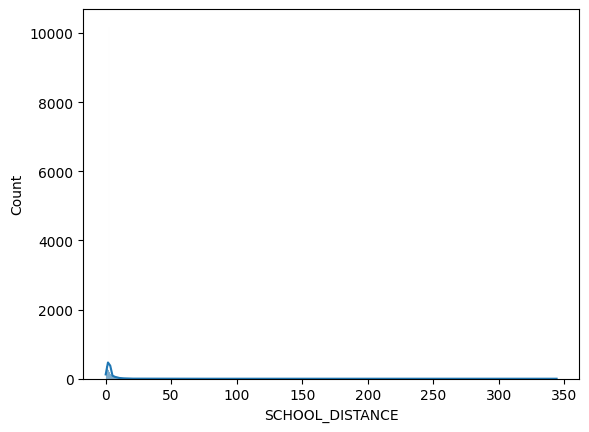

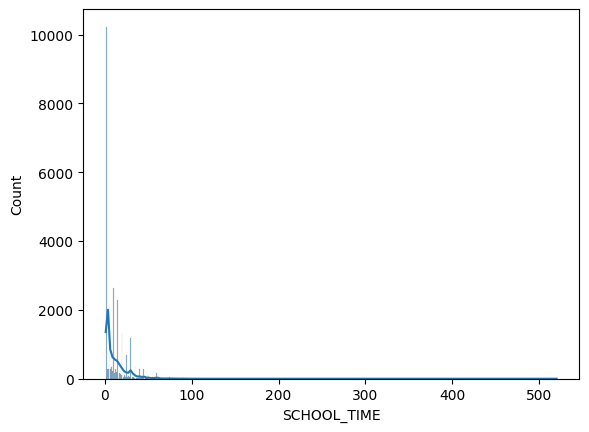

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(onehot_df['SCHOOL_DISTANCE'], kde=True)
plt.show()



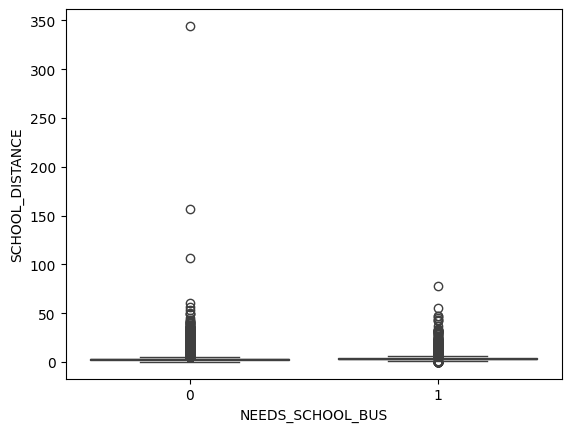

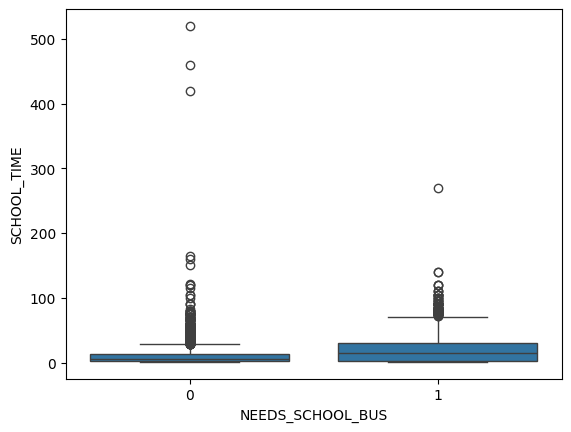

In [ ]:
sns.boxplot(x='NEEDS_SCHOOL_BUS', y='SCHOOL_DISTANCE', data=onehot_df)
plt.show()




In [48]:
non_onehot["LOG_DIST"] = np.log1p(non_onehot["SCHOOL_DISTANCE"])
non_onehot["SQRT_DIST"] = np.sqrt(non_onehot["SCHOOL_DISTANCE"])
non_onehot["SQUARE_DIST"] = non_onehot["SCHOOL_DISTANCE"] ** 2
non_onehot["DIST_DBH"] = non_onehot["SCHOOL_DISTANCE"]*non_onehot["DBHTNRNT"]
non_onehot["DIST_DBP"] = non_onehot["SCHOOL_DISTANCE"]*non_onehot["DBPPOPDN"]
non_onehot["DIST_DBR"] = non_onehot["SCHOOL_DISTANCE"]*non_onehot["DBRESDN"]

In [49]:
# List of CENSUS_D columns
census_d_cols = {
    'New England':1,
    'Middle Atlantic':2,
    'East North Central':3,
    'West North Central':4,
    'South Atlantic':5,
    'East South Central':6,
    'West South Central':7,
    'Mountain':8,
    'Pacific':9
}

# Dictionary to store mini dataframes
mini_dfs = {}

# Iterate over each Census D column
for col in census_d_cols:
    # Select only rows where this category is 1
    subset = non_onehot[non_onehot["CENSUS_D"] == census_d_cols[col]].copy()

    # Drop all Census D columns
    subset = subset.drop(columns="CENSUS_D")

    # Store in dictionary
    mini_dfs[col] = subset

# Now mini_dfs contains a separate DataFrame for each Census D category
# Example access:
print("Number of rows in New England mini-df:", len(mini_dfs['New England']))


Number of rows in New England mini-df: 359


In [50]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score,
    roc_auc_score, confusion_matrix, classification_report
)
from imblearn.over_sampling import SMOTE

# Assume mini_dfs is the dictionary from your previous step
target_col = 'NEEDS_SCHOOL_BUS'

# Dictionary to store trained Random Forests
mod_noh_thresh_smote_rf_models = {}

# Dictionary to store metrics
mod_noh_thresh_smote_rf_metrics = {}

for census_cat, df in mini_dfs.items():
    print(f"\n=== Processing {census_cat} ===")

    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Train-test split 80-20
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # --- APPLY SMOTE ON TRAINING DATA ONLY ---
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

    # Train RF on the resampled data
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train_res, y_train_res)

    # Store model
    mod_noh_thresh_smote_rf_models[census_cat] = rf

    # Predictions
    y_prob = rf.predict_proba(X_test)[:, 1]  # probability for class 1
    y_pred = (y_prob >= 0.40).astype(int)   # apply threshold of 0.40


    # Metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision_0': precision_score(y_test, y_pred, pos_label=0, zero_division=0),
        'precision_1': precision_score(y_test, y_pred, pos_label=1, zero_division=0),
        'recall_0': recall_score(y_test, y_pred, pos_label=0, zero_division=0),
        'recall_1': recall_score(y_test, y_pred, pos_label=1, zero_division=0),
        'f1_0': f1_score(y_test, y_pred, pos_label=0, zero_division=0),
        'f1_1': f1_score(y_test, y_pred, pos_label=1, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        "y_pred_array": y_pred,
        "y_test_array": y_test.values,
        "y_prob_array": y_prob
    }

    mod_noh_thresh_smote_rf_metrics[census_cat] = metrics

    # Display metrics
    print(f"Accuracy: {metrics['accuracy']:.3f}")
    print(f"ROC-AUC: {metrics['roc_auc']:.3f}")
    print(f"Precision: 0={metrics['precision_0']:.3f}, 1={metrics['precision_1']:.3f}")
    print(f"Recall: 0={metrics['recall_0']:.3f}, 1={metrics['recall_1']:.3f}")
    print(f"F1-score: 0={metrics['f1_0']:.3f}, 1={metrics['f1_1']:.3f}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])



=== Processing New England ===
Accuracy: 0.694
ROC-AUC: 0.741
Precision: 0=0.800, 1=0.619
Recall: 0=0.600, 1=0.812
F1-score: 0=0.686, 1=0.703
Confusion Matrix:
[[24 16]
 [ 6 26]]

=== Processing Middle Atlantic ===
Accuracy: 0.734
ROC-AUC: 0.800
Precision: 0=0.788, 1=0.709
Recall: 0=0.561, 1=0.876
F1-score: 0=0.655, 1=0.784
Confusion Matrix:
[[171 134]
 [ 46 326]]

=== Processing East North Central ===
Accuracy: 0.721
ROC-AUC: 0.816
Precision: 0=0.834, 1=0.580
Recall: 0=0.713, 1=0.736
F1-score: 0=0.769, 1=0.649
Confusion Matrix:
[[281 113]
 [ 56 156]]

=== Processing West North Central ===
Accuracy: 0.723
ROC-AUC: 0.780
Precision: 0=0.827, 1=0.557
Recall: 0=0.750, 1=0.667
F1-score: 0=0.787, 1=0.607
Confusion Matrix:
[[105  35]
 [ 22  44]]

=== Processing South Atlantic ===
Accuracy: 0.701
ROC-AUC: 0.797
Precision: 0=0.811, 1=0.575
Recall: 0=0.688, 1=0.725
F1-score: 0=0.744, 1=0.642
Confusion Matrix:
[[484 220]
 [113 298]]

=== Processing East South Central ===
Accuracy: 0.661
ROC-AUC:

In [51]:
show_stats(mod_noh_thresh_smote_rf_metrics)

accuracy : 0.7593337162550259
precision_0 : 0.861463454613415
precision_1 : 0.5825126950892262
recall_0 : 0.7747252747252747
recall_1 : 0.7239418825015793
f1_0 : 0.8140706059405689
f1_1 : 0.6451375253429508
roc_auc : 0.8376430029225355
confusion_matrix : [[2820  820]
 [ 437 1146]]


In [52]:
show_stats(noh_thresh_smote_rf_metrics)
show_stats(thresh_smote_rf_metrics)
show_stats(smote_rf_metrics)
show_stats(rf_metrics)


accuracy : 0.7690982194141298
precision_0 : 0.8666031912741765
precision_1 : 0.5959022471595874
recall_0 : 0.7854395604395604
recall_1 : 0.7315224257738471
f1_0 : 0.8224206190652167
f1_1 : 0.6564852110968287
roc_auc : 0.8425170770480309
confusion_matrix : [[2859  781]
 [ 425 1158]]
accuracy : 0.7751479289940828
precision_0 : 0.8697748668317185
precision_1 : 0.6037858376006292
recall_0 : 0.7901369863013699
recall_1 : 0.7407174323473883
f1_0 : 0.8258909172301826
f1_1 : 0.6636677337278736
roc_auc : 0.8426876557152339
confusion_matrix : [[2884  766]
 [ 412 1177]]
accuracy : 0.8022523382324871
precision_0 : 0.8357511227327036
precision_1 : 0.6984009682017611
recall_0 : 0.8901369863013698
recall_1 : 0.6003775959723097
f1_0 : 0.8617692508804758
f1_1 : 0.640837661721743
roc_auc : 0.8426876557152339
confusion_matrix : [[3249  401]
 [ 635  954]]
accuracy : 0.8079786218744035
precision_0 : 0.8248728104416079
precision_1 : 0.7550799886243347
recall_0 : 0.92
recall_1 : 0.5506607929515418
f1_0 : 0.8

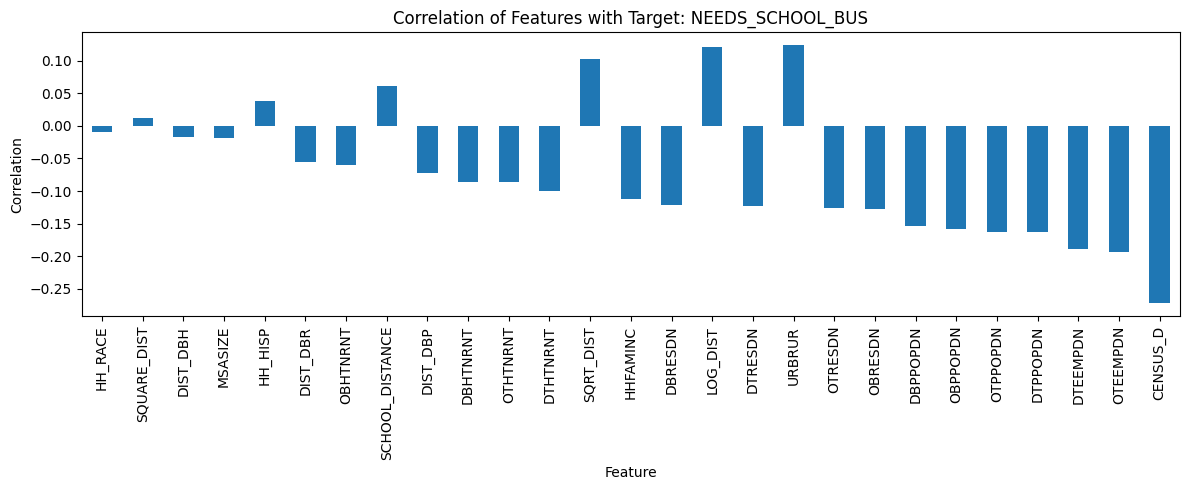

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

df = non_onehot
target = "NEEDS_SCHOOL_BUS"

# Compute correlation with the target for all numeric features
corrs = df.corr()[target].drop(labels=[target])
# Sort by absolute value (strongest → weakest)
corrs_sorted = corrs.reindex(corrs.abs().sort_values(ascending=True).index)

plt.figure(figsize=(12, 5))
corrs_sorted.plot(kind='bar')
plt.title(f"Correlation of Features with Target: {target}")
plt.xlabel("Feature")
plt.ylabel("Correlation")
plt.tight_layout()
plt.show()


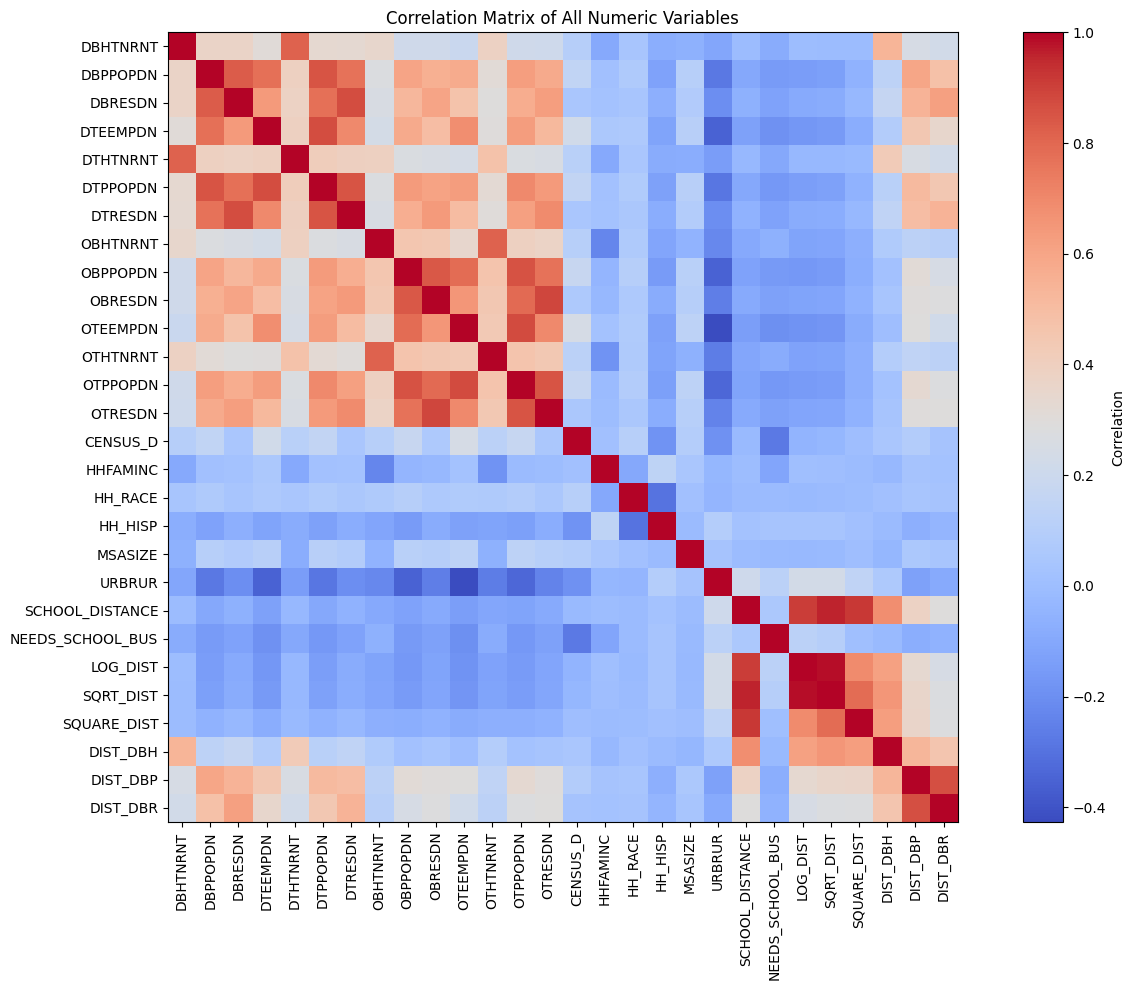

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute correlation matrix for all numeric variables
corr_matrix = df.corr()

plt.figure(figsize=(14, 10))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title("Correlation Matrix of All Numeric Variables")
plt.tight_layout()
plt.show()


In [58]:
non_onehot.head()

,DBHTNRNT,DBPPOPDN,DBRESDN,DTEEMPDN,DTHTNRNT,DTPPOPDN,DTRESDN,OBHTNRNT,OBPPOPDN,OBRESDN,...,MSASIZE,URBRUR,SCHOOL_DISTANCE,NEEDS_SCHOOL_BUS,LOG_DIST,SQRT_DIST,SQUARE_DIST,DIST_DBH,DIST_DBP,DIST_DBR
0,30,7000,3000,3000,30,7000,3000,70,7000,3000,...,5,1,2.426,0,1.231393,1.557562,5.885476,72.78,16982.0,7278.0
1,30,7000,3000,3000,30,7000,3000,70,7000,3000,...,5,1,2.426,0,1.231393,1.557562,5.885476,72.78,16982.0,7278.0
2,5,750,300,350,5,750,300,0,3000,750,...,5,1,7.738,0,2.167681,2.781726,59.876644,38.69,5803.5,2321.4
3,20,7000,1500,1500,5,3000,1500,20,3000,1500,...,4,1,15.403,1,2.797464,3.924666,237.252409,308.06,107821.0,23104.5
4,80,3000,750,1500,50,3000,1500,50,3000,1500,...,1,1,2.624,1,1.287578,1.619877,6.885376,209.92,7872.0,1968.0


In [61]:
# List of feasible columns including identifiers

new_feasible_columns = [
    "NEEDS_SCHOOL_BUS",
    "OTEEMPDN",
    "OBPPOPDN",
    "OBRESDN",
    "URBRUR",
    "LOG_DIST",
    "HHFAMINC",
    "CENSUS_D"
]


# Filter the dataframe
non_filtered = non_onehot[new_feasible_columns].copy()

# Preview
print("Filtered dataframe shape:", non_filtered.shape)
non_filtered.head()


Filtered dataframe shape: (26097, 8)


,NEEDS_SCHOOL_BUS,OTEEMPDN,OBPPOPDN,OBRESDN,URBRUR,LOG_DIST,HHFAMINC,CENSUS_D
0,0,1500,7000,3000,1,1.231393,5,7
1,0,1500,7000,3000,1,1.231393,5,7
2,0,750,3000,750,1,2.167681,11,7
3,1,1500,3000,1500,1,2.797464,8,6
4,1,1500,3000,1500,1,1.287578,3,2


In [62]:
# List of CENSUS_D columns
census_d_cols = {
    'New England':1,
    'Middle Atlantic':2,
    'East North Central':3,
    'West North Central':4,
    'South Atlantic':5,
    'East South Central':6,
    'West South Central':7,
    'Mountain':8,
    'Pacific':9
}

# Dictionary to store mini dataframes
mini_dfs = {}

# Iterate over each Census D column
for col in census_d_cols:
    # Select only rows where this category is 1
    subset = non_onehot[non_onehot["CENSUS_D"] == census_d_cols[col]].copy()

    # Drop all Census D columns
    subset = subset.drop(columns="CENSUS_D")

    # Store in dictionary
    mini_dfs[col] = subset

# Now mini_dfs contains a separate DataFrame for each Census D category
# Example access:
print("Number of rows in New England mini-df:", len(mini_dfs['New England']))



Number of rows in New England mini-df: 359


In [63]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score,
    roc_auc_score, confusion_matrix, classification_report
)
from imblearn.over_sampling import SMOTE

# Assume mini_dfs is the dictionary from your previous step
target_col = 'NEEDS_SCHOOL_BUS'

# Dictionary to store trained Random Forests
sim_mod_noh_thresh_smote_rf_models = {}

# Dictionary to store metrics
sim_mod_noh_thresh_smote_rf_metrics = {}

for census_cat, df in mini_dfs.items():
    print(f"\n=== Processing {census_cat} ===")

    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Train-test split 80-20
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # --- APPLY SMOTE ON TRAINING DATA ONLY ---
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

    # Train RF on the resampled data
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train_res, y_train_res)

    # Store model
    sim_mod_noh_thresh_smote_rf_models[census_cat] = rf

    # Predictions
    y_prob = rf.predict_proba(X_test)[:, 1]  # probability for class 1
    y_pred = (y_prob >= 0.40).astype(int)   # apply threshold of 0.40


    # Metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision_0': precision_score(y_test, y_pred, pos_label=0, zero_division=0),
        'precision_1': precision_score(y_test, y_pred, pos_label=1, zero_division=0),
        'recall_0': recall_score(y_test, y_pred, pos_label=0, zero_division=0),
        'recall_1': recall_score(y_test, y_pred, pos_label=1, zero_division=0),
        'f1_0': f1_score(y_test, y_pred, pos_label=0, zero_division=0),
        'f1_1': f1_score(y_test, y_pred, pos_label=1, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        "y_pred_array": y_pred,
        "y_test_array": y_test.values,
        "y_prob_array": y_prob
    }

    sim_mod_noh_thresh_smote_rf_metrics[census_cat] = metrics

    # Display metrics
    print(f"Accuracy: {metrics['accuracy']:.3f}")
    print(f"ROC-AUC: {metrics['roc_auc']:.3f}")
    print(f"Precision: 0={metrics['precision_0']:.3f}, 1={metrics['precision_1']:.3f}")
    print(f"Recall: 0={metrics['recall_0']:.3f}, 1={metrics['recall_1']:.3f}")
    print(f"F1-score: 0={metrics['f1_0']:.3f}, 1={metrics['f1_1']:.3f}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])



=== Processing New England ===
Accuracy: 0.694
ROC-AUC: 0.741
Precision: 0=0.800, 1=0.619
Recall: 0=0.600, 1=0.812
F1-score: 0=0.686, 1=0.703
Confusion Matrix:
[[24 16]
 [ 6 26]]

=== Processing Middle Atlantic ===
Accuracy: 0.734
ROC-AUC: 0.800
Precision: 0=0.788, 1=0.709
Recall: 0=0.561, 1=0.876
F1-score: 0=0.655, 1=0.784
Confusion Matrix:
[[171 134]
 [ 46 326]]

=== Processing East North Central ===
Accuracy: 0.721
ROC-AUC: 0.816
Precision: 0=0.834, 1=0.580
Recall: 0=0.713, 1=0.736
F1-score: 0=0.769, 1=0.649
Confusion Matrix:
[[281 113]
 [ 56 156]]

=== Processing West North Central ===
Accuracy: 0.723
ROC-AUC: 0.780
Precision: 0=0.827, 1=0.557
Recall: 0=0.750, 1=0.667
F1-score: 0=0.787, 1=0.607
Confusion Matrix:
[[105  35]
 [ 22  44]]

=== Processing South Atlantic ===
Accuracy: 0.701
ROC-AUC: 0.797
Precision: 0=0.811, 1=0.575
Recall: 0=0.688, 1=0.725
F1-score: 0=0.744, 1=0.642
Confusion Matrix:
[[484 220]
 [113 298]]

=== Processing East South Central ===
Accuracy: 0.661
ROC-AUC:

In [64]:
show_stats(sim_mod_noh_thresh_smote_rf_metrics)

accuracy : 0.7593337162550259
precision_0 : 0.861463454613415
precision_1 : 0.5825126950892262
recall_0 : 0.7747252747252747
recall_1 : 0.7239418825015793
f1_0 : 0.8140706059405689
f1_1 : 0.6451375253429508
roc_auc : 0.8376430029225355
confusion_matrix : [[2820  820]
 [ 437 1146]]


In [66]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score,
    roc_auc_score, confusion_matrix, classification_report
)

# Assume mini_dfs is the dictionary from your previous step
target_col = 'NEEDS_SCHOOL_BUS'

# Dictionary to store trained Random Forests
sim_mod_noh_thresh_smote_rf_models = {}

# Dictionary to store metrics
sim_mod_noh_thresh_smote_rf_metrics = {}

for census_cat, df in mini_dfs.items():
    print(f"\n=== Processing {census_cat} ===")

    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Train-test split 80-20
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Train RF
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)

    # Store model
    sim_mod_noh_thresh_smote_rf_models[census_cat] = rf

    # Predictions


    y_prob = rf.predict_proba(X_test)[:, 1]  # for ROC-AUC
    y_pred = (y_prob >= 0.40).astype(int)   # apply threshold of 0.40

    # Metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision_0': precision_score(y_test, y_pred, pos_label=0, zero_division=0),
        'precision_1': precision_score(y_test, y_pred, pos_label=1, zero_division=0),
        'recall_0': recall_score(y_test, y_pred, pos_label=0, zero_division=0),
        'recall_1': recall_score(y_test, y_pred, pos_label=1, zero_division=0),
        'f1_0': f1_score(y_test, y_pred, pos_label=0, zero_division=0),
        'f1_1': f1_score(y_test, y_pred, pos_label=1, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        "y_pred_array": y_pred,
        "y_test_array": y_test.values,
        "y_prob_array": y_prob
    }

    sim_mod_noh_thresh_smote_rf_metrics[census_cat] = metrics

    # Display metrics
    print(f"Accuracy: {metrics['accuracy']:.3f}")
    print(f"ROC-AUC: {metrics['roc_auc']:.3f}")
    print(f"Precision: 0={metrics['precision_0']:.3f}, 1={metrics['precision_1']:.3f}")
    print(f"Recall: 0={metrics['recall_0']:.3f}, 1={metrics['recall_1']:.3f}")
    print(f"F1-score: 0={metrics['f1_0']:.3f}, 1={metrics['f1_1']:.3f}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])



=== Processing New England ===
Accuracy: 0.681
ROC-AUC: 0.733
Precision: 0=0.743, 1=0.622
Recall: 0=0.650, 1=0.719
F1-score: 0=0.693, 1=0.667
Confusion Matrix:
[[26 14]
 [ 9 23]]

=== Processing Middle Atlantic ===
Accuracy: 0.730
ROC-AUC: 0.796
Precision: 0=0.777, 1=0.707
Recall: 0=0.561, 1=0.868
F1-score: 0=0.651, 1=0.779
Confusion Matrix:
[[171 134]
 [ 49 323]]

=== Processing East North Central ===
Accuracy: 0.743
ROC-AUC: 0.821
Precision: 0=0.829, 1=0.615
Recall: 0=0.761, 1=0.708
F1-score: 0=0.794, 1=0.658
Confusion Matrix:
[[300  94]
 [ 62 150]]

=== Processing West North Central ===
Accuracy: 0.718
ROC-AUC: 0.767
Precision: 0=0.820, 1=0.551
Recall: 0=0.750, 1=0.652
F1-score: 0=0.784, 1=0.597
Confusion Matrix:
[[105  35]
 [ 23  43]]

=== Processing South Atlantic ===
Accuracy: 0.716
ROC-AUC: 0.793
Precision: 0=0.789, 1=0.605
Recall: 0=0.750, 1=0.657
F1-score: 0=0.769, 1=0.630
Confusion Matrix:
[[528 176]
 [141 270]]

=== Processing East South Central ===
Accuracy: 0.661
ROC-AUC:

In [67]:
show_stats(sim_mod_noh_thresh_smote_rf_metrics)

accuracy : 0.7800114876507754
precision_0 : 0.8450515224955655
precision_1 : 0.6288591699396542
recall_0 : 0.8324175824175825
recall_1 : 0.6595072646873026
f1_0 : 0.8364625379597158
f1_1 : 0.6363773081771236
roc_auc : 0.8365826293100456
confusion_matrix : [[3030  610]
 [ 539 1044]]


In [68]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score,
    roc_auc_score, confusion_matrix
)
from imblearn.over_sampling import SMOTE

# Assume mini_dfs is the dictionary from your previous step
target_col = 'NEEDS_SCHOOL_BUS'

# Dictionaries to store models and metrics
grid_rf_models = {}
grid_rf_metrics = {}

# Define hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

for census_cat, df in mini_dfs.items():
    print(f"\n=== Processing {census_cat} ===")

    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Train-test split 80-20
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Apply SMOTE to training set
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    # GridSearchCV for Random Forest
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(
        rf,
        param_grid,
        scoring='roc_auc',  # can change metric if desired
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train_res, y_train_res)

    # Best model
    best_rf = grid_search.best_estimator_
    grid_rf_models[census_cat] = best_rf

    # Predictions
    y_prob = best_rf.predict_proba(X_test)[:, 1]  # for ROC-AUC
    y_pred = (y_prob >= 0.40).astype(int)         # apply threshold of 0.40

    # Metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision_0': precision_score(y_test, y_pred, pos_label=0, zero_division=0),
        'precision_1': precision_score(y_test, y_pred, pos_label=1, zero_division=0),
        'recall_0': recall_score(y_test, y_pred, pos_label=0, zero_division=0),
        'recall_1': recall_score(y_test, y_pred, pos_label=1, zero_division=0),
        'f1_0': f1_score(y_test, y_pred, pos_label=0, zero_division=0),
        'f1_1': f1_score(y_test, y_pred, pos_label=1, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        "y_pred_array": y_pred,
        "y_test_array": y_test.values,
        "y_prob_array": y_prob
    }

    grid_rf_metrics[census_cat] = metrics

    # Display metrics
    print(f"Best Params: {grid_search.best_params_}")
    print(f"Accuracy: {metrics['accuracy']:.3f}")
    print(f"ROC-AUC: {metrics['roc_auc']:.3f}")
    print(f"Precision: 0={metrics['precision_0']:.3f}, 1={metrics['precision_1']:.3f}")
    print(f"Recall: 0={metrics['recall_0']:.3f}, 1={metrics['recall_1']:.3f}")
    print(f"F1-score: 0={metrics['f1_0']:.3f}, 1={metrics['f1_1']:.3f}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])



=== Processing New England ===
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Params: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.681
ROC-AUC: 0.737
Precision: 0=0.758, 1=0.615
Recall: 0=0.625, 1=0.750
F1-score: 0=0.685, 1=0.676
Confusion Matrix:
[[25 15]
 [ 8 24]]

=== Processing Middle Atlantic ===
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.731
ROC-AUC: 0.798
Precision: 0=0.778, 1=0.708
Recall: 0=0.564, 1=0.868
F1-score: 0=0.654, 1=0.780
Confusion Matrix:
[[172 133]
 [ 49 323]]

=== Processing East North Central ===
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Params: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.731
ROC-AUC: 0.816
P

In [70]:
show_stats(grid_rf_metrics)
show_stats(sim_mod_noh_thresh_smote_rf_metrics)

accuracy : 0.7639287765651924
precision_0 : 0.8626154391740836
precision_1 : 0.5886551175330021
recall_0 : 0.781043956043956
recall_1 : 0.7245735944409349
f1_0 : 0.8181436873848822
f1_1 : 0.6489253411571387
roc_auc : 0.8379056666643527
confusion_matrix : [[2843  797]
 [ 436 1147]]
accuracy : 0.7800114876507754
precision_0 : 0.8450515224955655
precision_1 : 0.6288591699396542
recall_0 : 0.8324175824175825
recall_1 : 0.6595072646873026
f1_0 : 0.8364625379597158
f1_1 : 0.6363773081771236
roc_auc : 0.8365826293100456
confusion_matrix : [[3030  610]
 [ 539 1044]]


In [71]:
from sklearn.metrics import make_scorer, f1_score

# Custom scorer for F1 of the positive class
f1_pos_scorer = make_scorer(f1_score, pos_label=1)

for census_cat, df in mini_dfs.items():
    print(f"\n=== Processing {census_cat} ===")

    X = df.drop(columns=[target_col])
    y = df[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Apply SMOTE to training set
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    # GridSearchCV with F1 positive scorer
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(
        rf,
        param_grid,
        scoring=f1_pos_scorer,  # <-- here
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train_res, y_train_res)

    best_rf = grid_search.best_estimator_
    grid_rf_models[census_cat] = best_rf

    y_prob = best_rf.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= 0.40).astype(int)

    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision_0': precision_score(y_test, y_pred, pos_label=0, zero_division=0),
        'precision_1': precision_score(y_test, y_pred, pos_label=1, zero_division=0),
        'recall_0': recall_score(y_test, y_pred, pos_label=0, zero_division=0),
        'recall_1': recall_score(y_test, y_pred, pos_label=1, zero_division=0),
        'f1_0': f1_score(y_test, y_pred, pos_label=0, zero_division=0),
        'f1_1': f1_score(y_test, y_pred, pos_label=1, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        "y_pred_array": y_pred,
        "y_test_array": y_test.values,
        "y_prob_array": y_prob
    }

    grid_rf_metrics[census_cat] = metrics

    print(f"Best Params: {grid_search.best_params_}")
    print(f"Accuracy: {metrics['accuracy']:.3f}")
    print(f"ROC-AUC: {metrics['roc_auc']:.3f}")
    print(f"Precision: 0={metrics['precision_0']:.3f}, 1={metrics['precision_1']:.3f}")
    print(f"Recall: 0={metrics['recall_0']:.3f}, 1={metrics['recall_1']:.3f}")
    print(f"F1-score: 0={metrics['f1_0']:.3f}, 1={metrics['f1_1']:.3f}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])



=== Processing New England ===
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.694
ROC-AUC: 0.741
Precision: 0=0.765, 1=0.632
Recall: 0=0.650, 1=0.750
F1-score: 0=0.703, 1=0.686
Confusion Matrix:
[[26 14]
 [ 8 24]]

=== Processing Middle Atlantic ===
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.731
ROC-AUC: 0.798
Precision: 0=0.778, 1=0.708
Recall: 0=0.564, 1=0.868
F1-score: 0=0.654, 1=0.780
Confusion Matrix:
[[172 133]
 [ 49 323]]

=== Processing East North Central ===
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Params: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.731
ROC-AUC: 0.816
P

Save the cleaned dataframe.

In [ ]:
#Save the dataframe as CSV
#onehot_df.to_csv('2017_OneHot_V1.csv', index=False)
from google.colab import files
#files.download('2017_OneHot_V1.csv')
